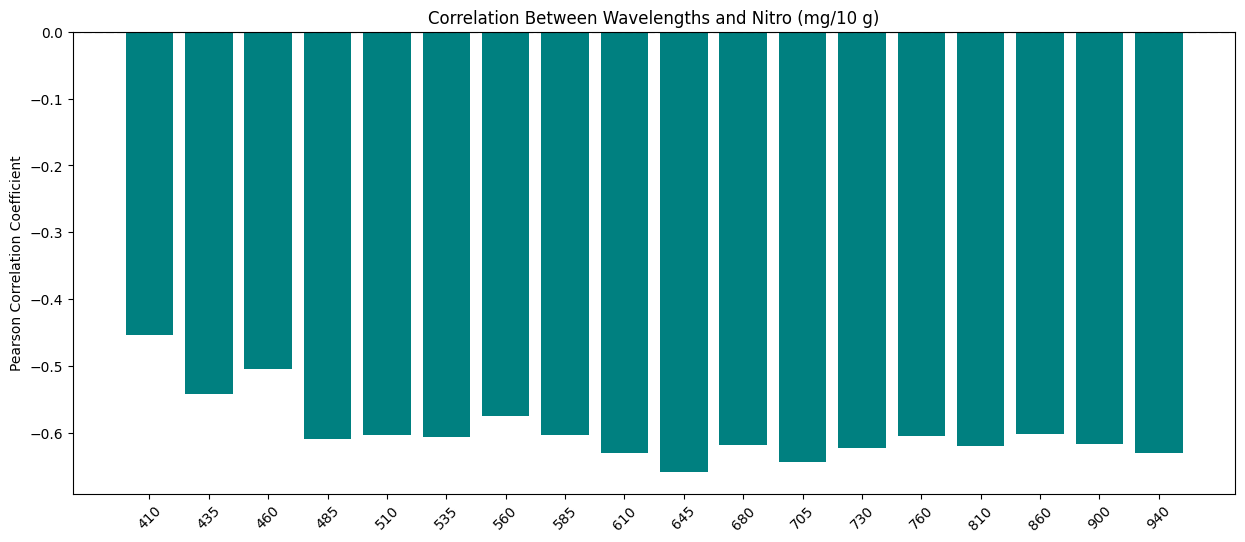

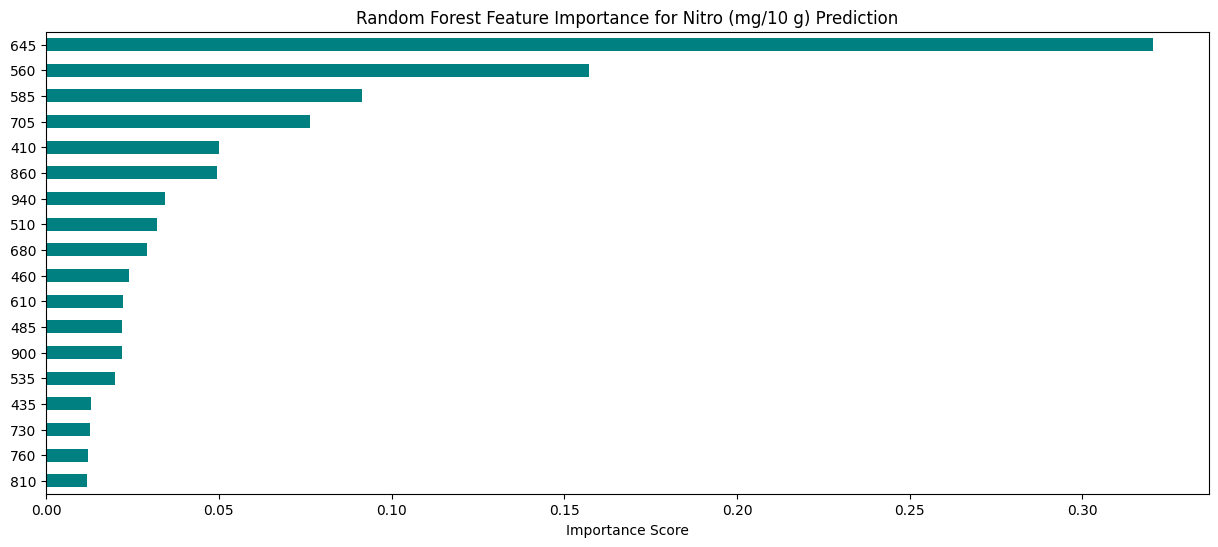

<ipython-input-3-f72776651061>:67: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for name, group in df.groupby(f'{target_column} group'):


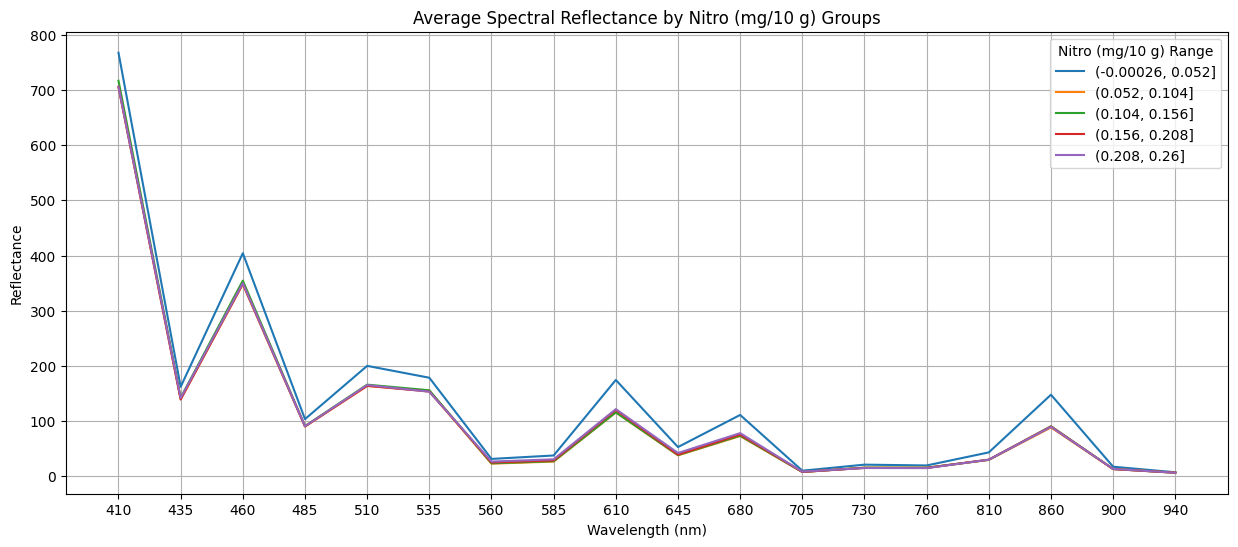

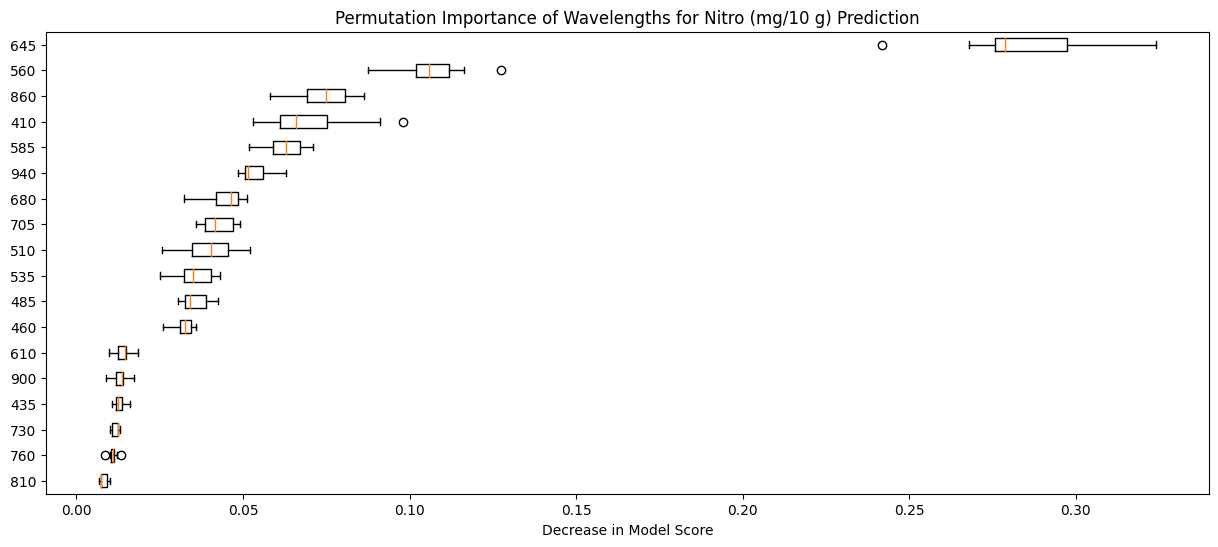


Top 5 most important wavelengths for Nitro (mg/10 g) prediction: ['645', '705', '940', '610', '730']

Interpretation Guide:
- Wavelengths with highest absolute correlation matter most
- Random Forest importance shows non-linear relationships
- Spectral plots show where target groups differ most
- Permutation importance is the most reliable metric


In [3]:
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# import seaborn as sns
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.inspection import permutation_importance

# # 1. Load your dataset
# df = pd.read_csv('/kaggle/input/soil-reve-ai-nirma-data/merged_soildataset_updated.csv')  # Use your actual file path

# # Define wavelengths (ensure these match your column names)
# wavelengths = ['410', '435', '460', '485', '510', '535', '560', '585', '610', 
#                '645', '680', '705', '730', '760', '810', '860', '900', '940']

# # Verify target column exists
# target_column = 'Nitro (mg/10 g)'  # Change this to your actual target column name
# if target_column not in df.columns:
#     raise ValueError(f"Target column '{target_column}' not found in dataset")

# # 2. Correlation Analysis - Plot wavelength vs target correlation
# plt.figure(figsize=(15, 6))
# correlations = df[wavelengths].corrwith(df[target_column])
# sns.barplot(x=wavelengths, y=correlations, palette='viridis')
# plt.axhline(0, color='k', linestyle='--')
# plt.title(f'Correlation Between Wavelengths and {target_column}')
# plt.ylabel('Pearson Correlation Coefficient')
# plt.xticks(rotation=45)
# plt.show()
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance

# 1. Load dataset
df = pd.read_csv('/kaggle/input/soil-reve-ai-nirma-data/merged_soildataset_updated.csv')  # Update with your path
wavelengths = ['410', '435', '460', '485', '510', '535', '560', '585', '610', 
               '645', '680', '705', '730', '760', '810', '860', '900', '940']
target_column = 'Nitro (mg/10 g)'  # Update to your target column

# 2. Correlation Analysis (matplotlib version)
plt.figure(figsize=(15, 6))
correlations = df[wavelengths].corrwith(df[target_column])
plt.bar(wavelengths, correlations, color='teal')
plt.axhline(0, color='k', linestyle='--')
plt.title(f'Correlation Between Wavelengths and {target_column}')
plt.ylabel('Pearson Correlation Coefficient')
plt.xticks(rotation=45)
plt.show()

# [Rest of your original code remains the same...]
# Only replace other seaborn functions if needed
# 3. Feature Importance using Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(df[wavelengths], df[target_column])

plt.figure(figsize=(15, 6))
importances = pd.Series(rf.feature_importances_, index=wavelengths).sort_values()
importances.plot(kind='barh', color='teal')
plt.title(f'Random Forest Feature Importance for {target_column} Prediction')
plt.xlabel('Importance Score')
plt.show()

# 4. Spectral Reflectance Plot by Target Groups
df[f'{target_column} group'] = pd.cut(df[target_column], bins=5)  # Create 5 groups
plt.figure(figsize=(15, 6))
for name, group in df.groupby(f'{target_column} group'):
    plt.plot(wavelengths, group[wavelengths].mean(), label=name)
plt.title(f'Average Spectral Reflectance by {target_column} Groups')
plt.xlabel('Wavelength (nm)')
plt.ylabel('Reflectance')
plt.legend(title=f'{target_column} Range')
plt.grid(True)
plt.show()

# 5. Permutation Importance (more reliable)
result = permutation_importance(rf, df[wavelengths], df[target_column], n_repeats=10, random_state=42)
sorted_idx = result.importances_mean.argsort()

plt.figure(figsize=(15, 6))
plt.boxplot(result.importances[sorted_idx].T, vert=False, labels=np.array(wavelengths)[sorted_idx])
plt.title(f"Permutation Importance of Wavelengths for {target_column} Prediction")
plt.xlabel("Decrease in Model Score")
plt.show()

# 6. Identify Key Wavelengths
key_wavelengths = correlations.abs().sort_values(ascending=False).head(5).index.tolist()
print(f"\nTop 5 most important wavelengths for {target_column} prediction: {key_wavelengths}")
print("\nInterpretation Guide:")
print("- Wavelengths with highest absolute correlation matter most")
print("- Random Forest importance shows non-linear relationships")
print("- Spectral plots show where target groups differ most")
print("- Permutation importance is the most reliable metric")

# Bonus: Save the important wavelengths to a file
pd.Series(key_wavelengths).to_csv('important_wavelengths.csv', index=False)

Available water levels: ['0ml' '25ml' '50ml' '75ml']

=== Analysis for 0ml (51 samples) ===
Best pair: 435nm/460nm (R2: 0.026)

=== Analysis for 25ml (52 samples) ===
Best pair: 435nm/460nm (R2: 0.021)

=== Analysis for 50ml (51 samples) ===
Best pair: 680nm/860nm (R2: 0.068)


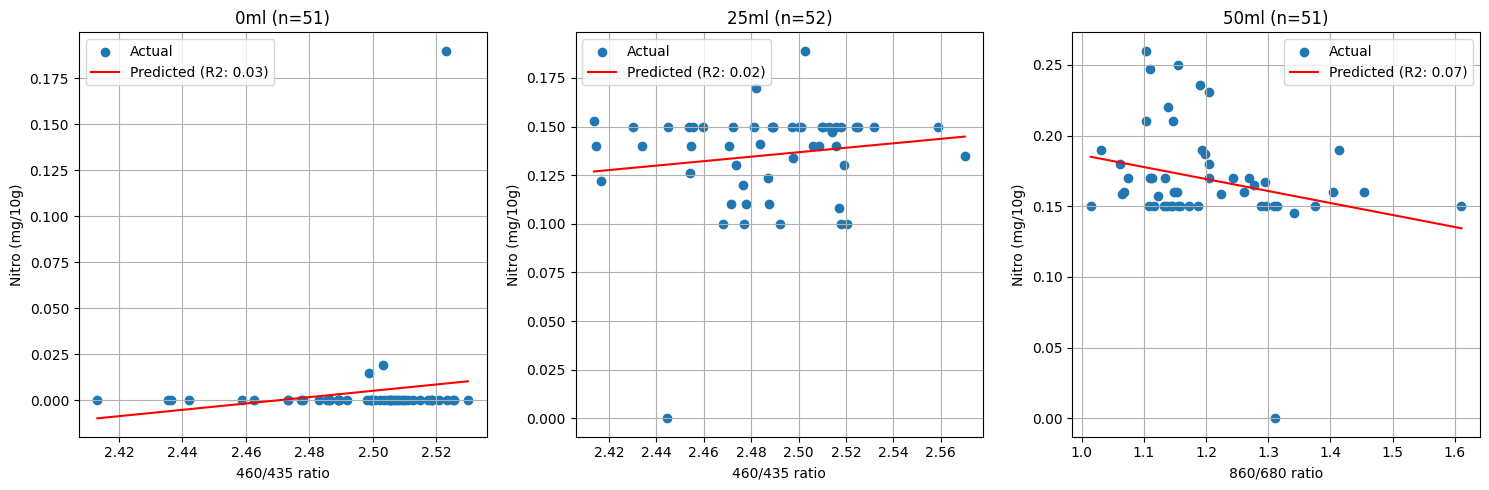

Predicted Nitro for 0ml: 0.005
Predicted Nitro for 25ml: 0.136
Predicted Nitro for 50ml: 0.169


In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress
from sklearn.metrics import r2_score

# 1. Simplified Data Loading
def load_data(filepath):
    df = pd.read_csv(filepath)
    df['water_level'] = df['Records'].str.extract(r'(\d+)ml')[0] + 'ml'
    return df.dropna(subset=['water_level', 'Nitro (mg/10 g)'])

# 2. Load Data
df = load_data('/kaggle/input/soil-reve-ai-nirma-data/merged_soildataset_updated.csv')
print("Available water levels:", df['water_level'].unique())

# 3. Water-Level Specific Analysis
results = {}
wavelength_pairs = [('435','460'), ('680','860'), ('435','680')]  # Key wavelength pairs

for level in ['0ml', '25ml', '50ml']:
    level_data = df[df['water_level'] == level]
    if len(level_data) < 3:
        print(f"\nSkipping {level} - only {len(level_data)} samples")
        continue
    
    print(f"\n=== Analysis for {level} ({len(level_data)} samples) ===")
    
    # Find best wavelength correlation
    best_r2 = -np.inf
    best_wl_pair = None
    best_model = None
    
    for wl1, wl2 in wavelength_pairs:
        if wl1 not in df.columns or wl2 not in df.columns:
            continue
            
        # Simple ratio feature
        X = (level_data[wl2] / (level_data[wl1] + 1e-9)).values.reshape(-1, 1)
        y = level_data['Nitro (mg/10 g)'].values
        
        # Linear regression
        slope, intercept, r_value, p_value, std_err = linregress(X.flatten(), y)
        current_r2 = r_value**2
        
        if current_r2 > best_r2:
            best_r2 = current_r2
            best_wl_pair = (wl1, wl2)
            best_model = (slope, intercept)
    
    # Store results
    if best_wl_pair:
        print(f"Best pair: {best_wl_pair[0]}nm/{best_wl_pair[1]}nm (R2: {best_r2:.3f})")
        results[level] = {
            'wl_pair': best_wl_pair,
            'slope': best_model[0],
            'intercept': best_model[1],
            'r2': best_r2,
            'samples': len(level_data)
        }

# 4. Prediction Function
def predict_nitro(water_level, reflectance_values):
    if water_level not in results:
        raise ValueError(f"No model for {water_level}")
    
    model = results[water_level]
    wl1, wl2 = model['wl_pair']
    ratio = reflectance_values[wl2] / (reflectance_values[wl1] + 1e-9)
    return model['slope'] * ratio + model['intercept']

# 5. Visualization
plt.figure(figsize=(15, 5))
for i, level in enumerate(results.keys(), 1):
    plt.subplot(1, len(results), i)
    
    model = results[level]
    level_data = df[df['water_level'] == level]
    wl1, wl2 = model['wl_pair']
    X = (level_data[wl2] / (level_data[wl1] + 1e-9)).values
    y = level_data['Nitro (mg/10 g)'].values
    
    plt.scatter(X, y, label='Actual')
    x_range = np.linspace(min(X), max(X), 10)
    plt.plot(x_range, model['slope']*x_range + model['intercept'], 'r-', 
             label=f'Predicted (R2: {model["r2"]:.2f})')
    plt.title(f'{level} (n={model["samples"]})')
    plt.xlabel(f'{wl2}/{wl1} ratio')
    plt.ylabel('Nitro (mg/10g)')
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()

# 6. Example Predictions
sample_reflectance = {
    '435': df['435'].median(),
    '460': df['460'].median(),
    '680': df['680'].median(),
    '860': df['860'].median()
}

for level in results:
    try:
        pred = predict_nitro(level, sample_reflectance)
        print(f"Predicted Nitro for {level}: {pred:.3f}")
    except Exception as e:
        print(f"Prediction failed for {level}: {str(e)}")

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cross_decomposition import PLSRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GroupKFold
from sklearn.metrics import r2_score, mean_squared_error

# 1. Enhanced Data Loading with Spectral Features
def load_and_enhance(filepath):
    df = pd.read_csv(filepath)
    
    # Extract water level
    df['water_level'] = df['Records'].str.extract(r'(\d+)ml')[0] + 'ml'
    
    # Calculate advanced spectral indices
    wavelengths = ['435', '460', '560', '680', '705', '860']
    for wl in wavelengths:
        df[f'log_{wl}'] = np.log1p(df[wl])
    
    # Vegetation indices
    df['NDVI'] = (df['860'] - df['680']) / (df['860'] + df['680'] + 1e-9)
    df['MSR'] = (df['860']/df['680'] - 1) / np.sqrt(df['860']/df['680'] + 1)
    df['CI'] = df['860']/df['680'] - 1
    df['DCNI'] = (df['860'] - df['680']) / (df['860'] + df['680'] + df['435'] + 1e-9)
    
    return df.dropna(subset=['Nitro (mg/10 g)'])

# 2. Load and prepare data
df = load_and_enhance('/kaggle/input/soil-reve-ai-nirma-data/merged_soildataset_updated.csv')
wavelengths = ['435', '460', '560', '680', '705', '860']
features = wavelengths + [f'log_{wl}' for wl in wavelengths] + ['NDVI', 'MSR', 'CI', 'DCNI']

# 3. Water-Level Specific PLS Regression with Robust CV
results = {}

for level in ['0ml', '25ml', '50ml']:
    level_data = df[df['water_level'] == level]
    
    # Increased minimum sample requirement
    if len(level_data) < 10:  # Need at least 10 samples for meaningful CV
        print(f"\nSkipping {level} - only {len(level_data)} samples")
        continue
    
    X = level_data[features]
    y = level_data['Nitro (mg/10 g)']
    groups = level_data.index
    
    # Optimize PLS components with GroupKFold
    best_score = -np.inf
    best_ncomp = 1
    cv_scores = {n: [] for n in range(1, min(6, len(features)))}
    
    # Use GroupKFold with limited splits
    cv = GroupKFold(n_splits=min(5, len(np.unique(groups))))
    
    for ncomp in range(1, min(6, len(features))):
        pls = make_pipeline(
            StandardScaler(),
            PLSRegression(n_components=ncomp)
        )
        
        fold_scores = []
        
        for train_idx, test_idx in cv.split(X, y, groups=groups):
            X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
            y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
            
            # Skip if test set is too small
            if len(y_test) < 2:
                continue
                
            try:
                pls.fit(X_train, y_train)
                y_pred = pls.predict(X_test)
                
                # Calculate both R² and MSE as fallback
                r2 = r2_score(y_test, y_pred)
                if not np.isinf(r2):
                    fold_scores.append(r2)
            except:
                continue
        
        # Only store if we got valid scores
        if len(fold_scores) > 0:
            mean_score = np.mean(fold_scores)
            cv_scores[ncomp] = fold_scores
            if mean_score > best_score:
                best_score = mean_score
                best_ncomp = ncomp
    
    # Final model with optimal components
    final_pls = make_pipeline(
        StandardScaler(),
        PLSRegression(n_components=best_ncomp)
    )
    final_pls.fit(X, y)
    y_pred = final_pls.predict(X)
    r2 = r2_score(y, y_pred)
    
    # Store results with CV score distribution
    results[level] = {
        'model': final_pls,
        'r2': r2,
        'n_components': best_ncomp,
        'cv_scores': cv_scores[best_ncomp],
        'cv_mean': best_score,
        'cv_std': np.std(cv_scores[best_ncomp]) if len(cv_scores[best_ncomp]) > 1 else 0,
        'samples': len(level_data)
    }
    
    print(f"\n{level} (n={len(level_data)})")
    print(f"Optimal PLS components: {best_ncomp}")
    print(f"Training R²: {r2:.3f}")
    print(f"CV R²: {best_score:.3f} ± {np.std(cv_scores[best_ncomp]):.3f}" 
          if len(cv_scores[best_ncomp]) > 1 else f"CV R²: {best_score:.3f}")

# 4. Feature Importance Analysis
print("\nFeature Importance Analysis:")
for level, res in results.items():
    pls = res['model'].steps[-1][1]
    coefs = pd.Series(
        np.abs(pls.coef_.ravel()),
        index=features
    ).sort_values(ascending=False)
    
    print(f"\nTop features for {level}:")
    print(coefs.head(10).to_string())

# 5. Robust Prediction Function
def predict_nitro(water_level, reflectance_data):
    if water_level not in results:
        raise ValueError(f"No model for {water_level}. Available models: {list(results.keys())}")
    
    # Prepare input features with validation
    input_data = {}
    for wl in wavelengths:
        val = reflectance_data.get(wl, np.nan)
        if not isinstance(val, (int, float)) or val < 0:
            raise ValueError(f"Invalid reflectance value for {wl}: {val}")
        input_data[wl] = [val]
        input_data[f'log_{wl}'] = [np.log1p(val)]
    
    # Calculate indices with validation
    try:
        r435 = reflectance_data['435']
        r680 = reflectance_data['680']
        r860 = reflectance_data['860']
        
        input_data['NDVI'] = [(r860 - r680) / (r860 + r680 + 1e-9)]
        input_data['MSR'] = [(r860/r680 - 1) / np.sqrt(r860/r680 + 1)] if r680 > 0 else [np.nan]
        input_data['CI'] = [r860/r680 - 1] if r680 > 0 else [np.nan]
        input_data['DCNI'] = [(r860 - r680) / (r860 + r680 + r435 + 1e-9)]
    except KeyError as e:
        raise ValueError(f"Missing required wavelength: {str(e)}")
    
    # Create DataFrame and predict
    X_pred = pd.DataFrame({col: input_data[col] for col in features})
    
    try:
        return results[water_level]['model'].predict(X_pred)[0][0]
    except Exception as e:
        raise ValueError(f"Prediction failed: {str(e)}")

# 6. Example Prediction with validation
print("\nExample Predictions:")
sample_reflectance = {
    '435': df['435'].median(),
    '460': df['460'].median(),
    '560': df['560'].median(),
    '680': df['680'].median(),
    '705': df['705'].median(),
    '860': df['860'].median()
}

for level in results:
    try:
        pred = predict_nitro(level, sample_reflectance)
        print(f"Predicted Nitro for {level}: {pred:.3f} mg/10g")
    except Exception as e:
        print(f"Prediction failed for {level}: {str(e)}")


0ml (n=51)
Optimal PLS components: 1
Training R²: 0.064
CV R²: -0.055 ± 0.076

25ml (n=52)
Optimal PLS components: 1
Training R²: 0.036
CV R²: -0.797 ± 1.137

50ml (n=51)
Optimal PLS components: 3
Training R²: 0.144
CV R²: -0.756 ± 0.725

Feature Importance Analysis:

Top features for 0ml:
log_560    0.000898
560        0.000776
log_705    0.000763
705        0.000699
log_435    0.000582
log_460    0.000554
435        0.000552
460        0.000527
log_680    0.000321
680        0.000314

Top features for 25ml:
860        0.000733
DCNI       0.000701
CI         0.000674
680        0.000665
MSR        0.000662
NDVI       0.000649
log_860    0.000638
560        0.000620
log_680    0.000586
log_560    0.000542

Top features for 50ml:
log_705    0.005341
460        0.005026
log_680    0.004806
log_460    0.004604
DCNI       0.003748
705        0.003710
NDVI       0.003649
MSR        0.003415
CI         0.003166
log_860    0.001814

Example Predictions:
Predicted Nitro for 0ml: 0.013 mg/10g


/usr/local/lib/python3.10/dist-packages/sklearn/cross_decomposition/_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


Loading and preprocessing data...

=== Processing 0ml ===
Optimizing models...
Evaluating final models...
PLS: R² = -0.0337 ± 0.0413
RF: R² = -0.2957 ± 0.5560
XGBoost: R² = -0.0200 ± 0.0364
Stacking: R² = -0.1006 ± 0.1573


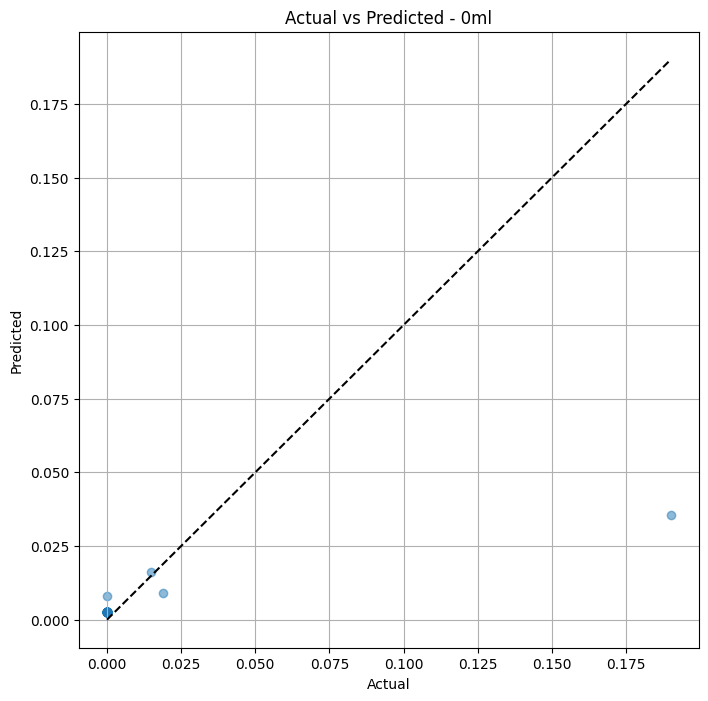

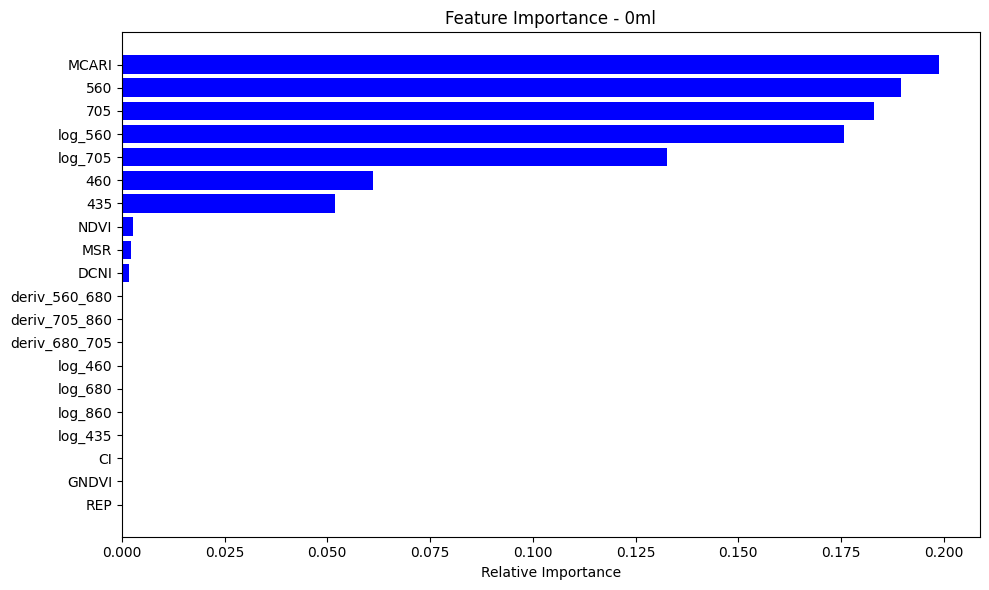


=== Processing 25ml ===
Optimizing models...
Evaluating final models...
PLS: R² = -0.6644 ± 0.9849
RF: R² = -0.6756 ± 0.7776
XGBoost: R² = -0.5491 ± 0.8452
Stacking: R² = -0.5635 ± 0.9930


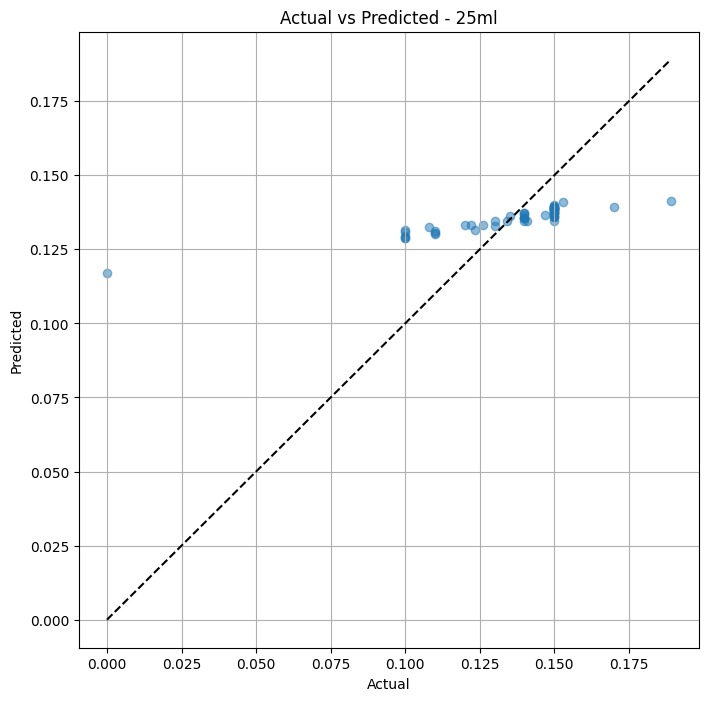

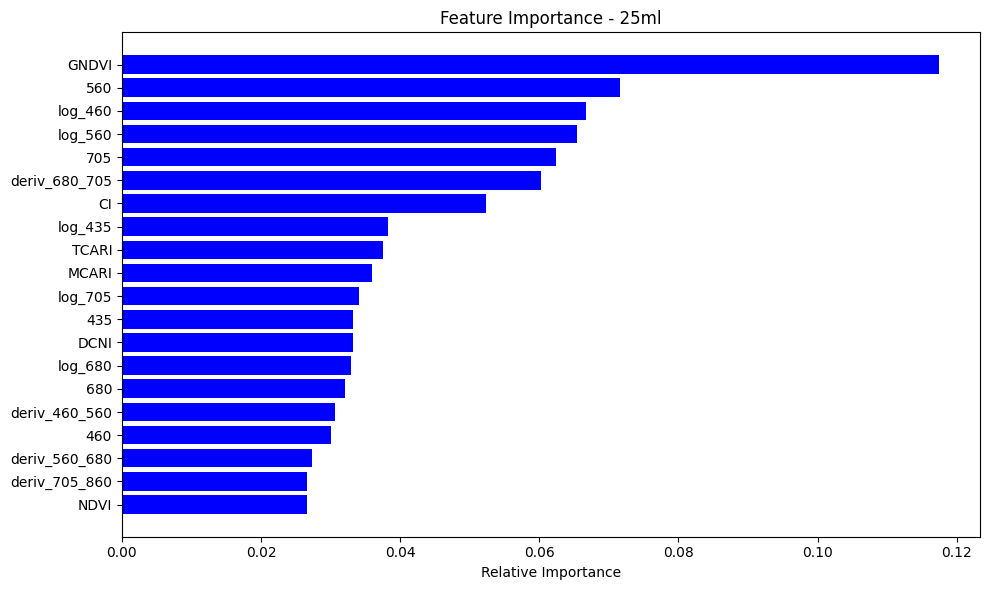


=== Processing 50ml ===
Optimizing models...
Evaluating final models...
PLS: R² = -0.7090 ± 0.7088
RF: R² = -0.4556 ± 0.5494
XGBoost: R² = -0.2142 ± 0.6764
Stacking: R² = -0.3519 ± 0.6229


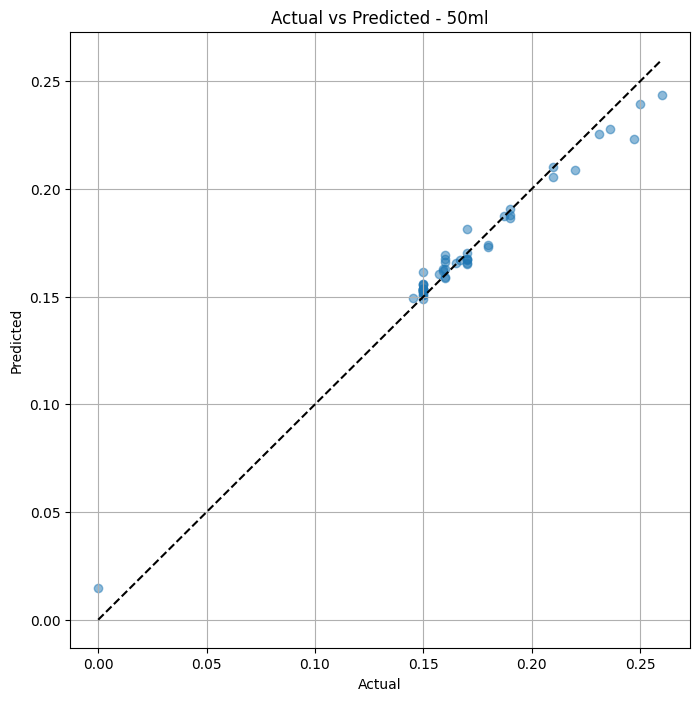

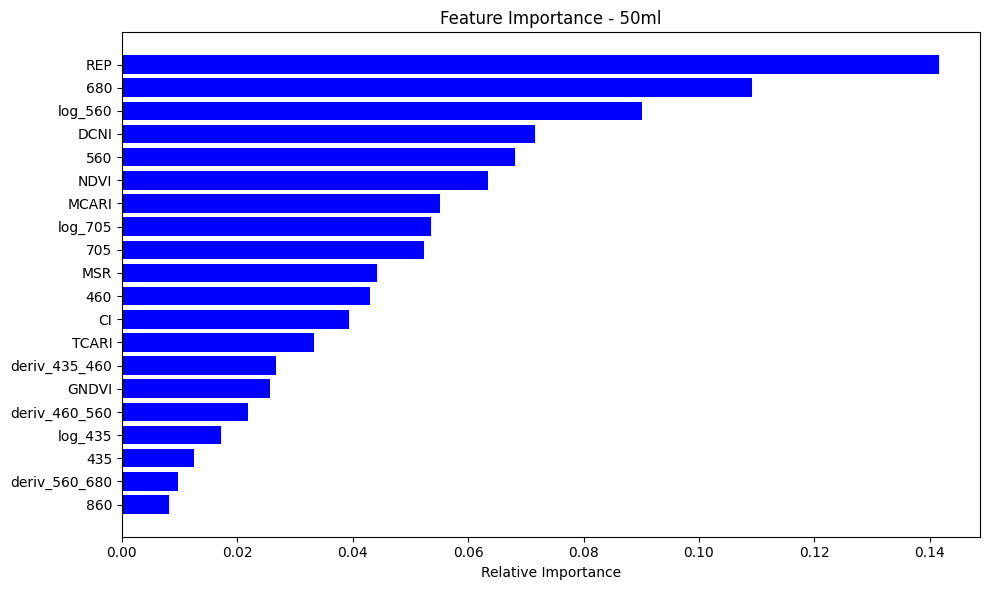


=== Processing nan ===
Skipping nan - insufficient samples

=== Processing 75ml ===
Skipping 75ml - insufficient samples

Saving models...
Saved soil_nitro_model_0ml.pkl
Saved soil_nitro_model_25ml.pkl
Saved soil_nitro_model_50ml.pkl


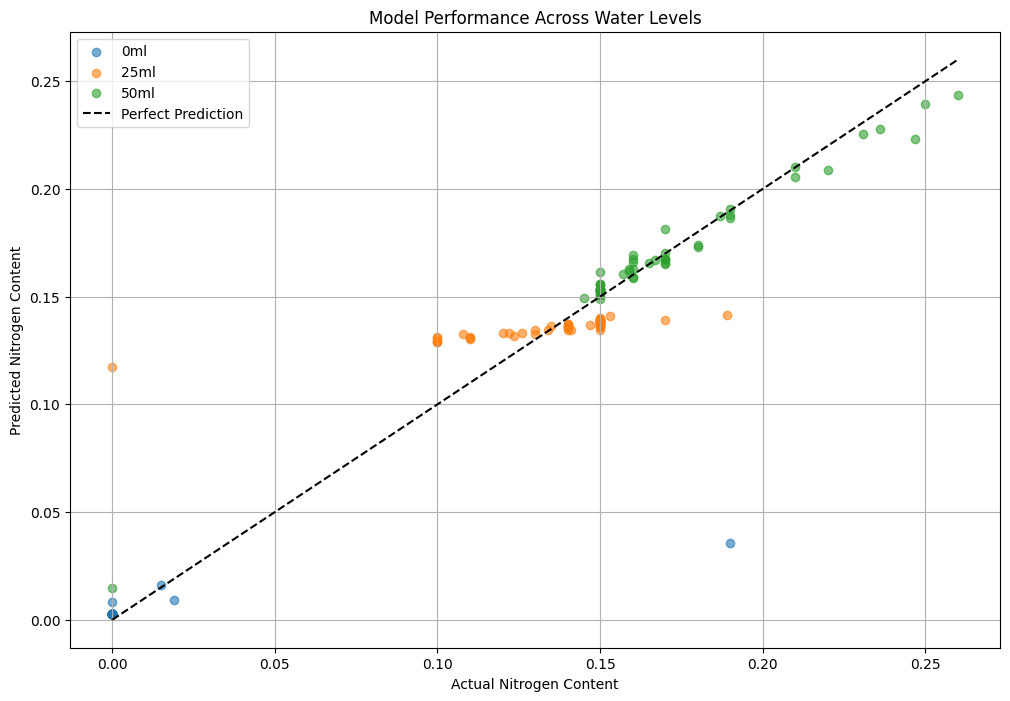


=== Analysis Complete ===


In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import joblib

# ML Libraries
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GroupKFold, RandomizedSearchCV, cross_val_score
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.cross_decomposition import PLSRegression
from sklearn.ensemble import RandomForestRegressor, StackingRegressor
from sklearn.neural_network import MLPRegressor

# Advanced ML Libraries
import xgboost as xgb
import lightgbm as lgb

# For Deep Learning
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

# 1. Enhanced Data Loading with Extended Spectral Features
def load_and_enhance(filepath):
    df = pd.read_csv(filepath)
    
    # Extract water level
    df['water_level'] = df['Records'].str.extract(r'(\d+)ml')[0] + 'ml'
    df['water_level_numeric'] = df['water_level'].str.extract(r'(\d+)').astype(float)
    
    # Basic wavelength features
    wavelengths = ['435', '460', '560', '680', '705', '860']
    for wl in wavelengths:
        df[f'log_{wl}'] = np.log1p(df[wl])
    
    # Basic vegetation indices
    df['NDVI'] = (df['860'] - df['680']) / (df['860'] + df['680'] + 1e-9)
    df['MSR'] = (df['860']/df['680'] - 1) / np.sqrt(df['860']/df['680'] + 1)
    df['CI'] = df['860']/df['680'] - 1
    df['DCNI'] = (df['860'] - df['680']) / (df['860'] + df['680'] + df['435'] + 1e-9)
    
    # Additional spectral indices
    df['GNDVI'] = (df['860'] - df['560']) / (df['860'] + df['560'] + 1e-9)  # Green NDVI
    df['REP'] = 700 + 40 * ((df['680'] + df['860'])/2 - df['705']) / (df['705'] - df['680'] + 1e-9)  # Red edge position
    df['MCARI'] = ((df['705'] - df['680']) - 0.2 * (df['705'] - df['560'])) * (df['705'] / (df['680'] + 1e-9))
    df['TCARI'] = 3 * ((df['705'] - df['680']) - 0.2 * (df['705'] - df['560']) * (df['705'] / (df['680'] + 1e-9)))
    
    # Spectral derivative features
    for i in range(len(wavelengths)-1):
        wl1 = int(wavelengths[i])
        wl2 = int(wavelengths[i+1])
        df[f'deriv_{wl1}_{wl2}'] = (df[wavelengths[i+1]] - df[wavelengths[i]]) / (wl2 - wl1)
    
    # Quadratic and interaction terms for reflectance values
    for i, wl1 in enumerate(wavelengths):
        # Quadratic terms
        df[f'{wl1}_squared'] = df[wl1] ** 2
        
        # Interaction terms with other wavelengths
        for wl2 in wavelengths[i+1:]:
            df[f'{wl1}_{wl2}_interact'] = df[wl1] * df[wl2]
    
    return df.dropna(subset=['Nitro (mg/10 g)'])

# 2. Data augmentation function
def augment_spectral_data(X, y, noise_level=0.02, n_samples=2):
    """Add noise to create synthetic samples"""
    X_orig = X.copy()
    y_orig = y.copy()
    
    X_aug = X_orig.copy()
    y_aug = y_orig.copy()
    
    for _ in range(n_samples):
        noise = np.random.normal(0, noise_level, X_orig.shape) * X_orig.values
        X_noisy = pd.DataFrame(X_orig.values + noise, columns=X_orig.columns, index=X_orig.index)
        X_aug = pd.concat([X_aug, X_noisy])
        y_aug = pd.concat([y_aug, y_orig])
    
    return X_aug, y_aug

# 3. PyTorch Dataset and Loader
def create_torch_dataloaders(X_train, y_train, X_test, y_test, batch_size=8):
    # Convert to torch tensors
    X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32)
    y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).reshape(-1, 1)
    X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32)
    y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32).reshape(-1, 1)
    
    # Create datasets
    train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
    test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
    
    # Create dataloaders
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)
    
    return train_loader, test_loader

# 4. Neural Network Models
class SpectralMLP(nn.Module):
    def __init__(self, input_size):
        super(SpectralMLP, self).__init__()
        self.fc1 = nn.Linear(input_size, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 32)
        self.fc4 = nn.Linear(32, 1)
        self.dropout = nn.Dropout(0.3)
        self.relu = nn.ReLU()
        self.bn1 = nn.BatchNorm1d(128)
        self.bn2 = nn.BatchNorm1d(64)
        self.bn3 = nn.BatchNorm1d(32)
        
    def forward(self, x):
        x = self.relu(self.bn1(self.fc1(x)))
        x = self.dropout(x)
        x = self.relu(self.bn2(self.fc2(x)))
        x = self.dropout(x)
        x = self.relu(self.bn3(self.fc3(x)))
        x = self.fc4(x)
        return x

# 5. Model Optimization Functions
def optimize_pls(X, y, groups):
    best_n_components = 1
    best_score = -np.inf
    cv = GroupKFold(n_splits=5)
    
    for n_comp in range(1, min(10, len(X.columns))):
        pls = make_pipeline(
            StandardScaler(),
            PLSRegression(n_components=n_comp)
        )
        
        scores = cross_val_score(pls, X, y, cv=cv, groups=groups, scoring='r2')
        avg_score = np.mean(scores)
        if avg_score > best_score:
            best_score = avg_score
            best_n_components = n_comp
            
    return best_n_components

def optimize_rf(X, y, groups):
    param_dist = {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    }
    
    cv = GroupKFold(n_splits=5)
    rf = RandomForestRegressor(random_state=42)
    search = RandomizedSearchCV(
        rf, 
        param_distributions=param_dist,
        n_iter=10, 
        cv=cv,
        scoring='r2',
        random_state=42, 
        n_jobs=-1
    )
    search.fit(X, y, groups=groups)
    return search.best_params_

def optimize_xgb(X, y, groups):
    param_dist = {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.05, 0.1],
        'max_depth': [3, 5, 7],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'subsample': [0.6, 0.8, 1.0]
    }
    
    cv = GroupKFold(n_splits=5)
    xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)
    search = RandomizedSearchCV(
        xgb_model, 
        param_distributions=param_dist,
        n_iter=10, 
        cv=cv,
        scoring='r2',
        random_state=42, 
        n_jobs=-1
    )
    search.fit(X, y, groups=groups)
    return search.best_params_

def create_stacking_model(best_params):
    base_models = [
        ('pls', make_pipeline(StandardScaler(), 
             PLSRegression(n_components=best_params['PLS']['n_components']))),
        ('rf', RandomForestRegressor(**best_params['RF'], random_state=42)),
        ('xgb', xgb.XGBRegressor(**best_params['XGBoost'], random_state=42))
    ]
    return StackingRegressor(
        estimators=base_models,
        final_estimator=xgb.XGBRegressor(**best_params['XGBoost'], random_state=42)
    )

# 6. Visualization Functions
def plot_feature_importance(model, feature_names, title):
    """Plot feature importance for tree-based models"""
    if hasattr(model, 'feature_importances_'):
        importances = model.feature_importances_
    elif hasattr(model, 'coef_'):
        importances = np.abs(model.coef_)
    else:
        print("Model doesn't support feature importance")
        return
    
    indices = np.argsort(importances)[-20:]  # Top 20 features
    plt.figure(figsize=(10, 6))
    plt.title(title)
    plt.barh(range(len(indices)), importances[indices], color='b', align='center')
    plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
    plt.xlabel('Relative Importance')
    plt.tight_layout()
    plt.show()

def plot_actual_vs_predicted(y_true, y_pred, title):
    """Scatter plot of actual vs predicted values"""
    plt.figure(figsize=(8, 8))
    plt.scatter(y_true, y_pred, alpha=0.5)
    plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'k--')
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title(title)
    plt.grid(True)
    plt.show()

# 7. Main Execution
def main():
    # Configuration
    DATA_PATH = '/kaggle/input/soil-reve-ai-nirma-data/merged_soildataset_updated.csv'
    TARGET_COL = 'Nitro (mg/10 g)'
    GROUP_COL = 'water_level'  # Using water levels as groups
    
    # 1. Load and preprocess data
    print("Loading and preprocessing data...")
    df = load_and_enhance(DATA_PATH)
    
    # 2. Prepare feature sets
    basic_wavelengths = ['435', '460', '560', '680', '705', '860']
    derived_features = ['NDVI', 'MSR', 'CI', 'DCNI', 'GNDVI', 'REP', 'MCARI', 'TCARI'] + \
                     [f'deriv_{basic_wavelengths[i]}_{basic_wavelengths[i+1]}' 
                      for i in range(len(basic_wavelengths)-1)] + \
                     [f'log_{wl}' for wl in basic_wavelengths]
    
    all_features = basic_wavelengths + derived_features
    
    # Device for PyTorch
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    
    # Process each water level
    water_levels = df['water_level'].unique()
    all_results = {}
    all_predictions = pd.DataFrame()
    
    for level in water_levels:
        print(f"\n=== Processing {level} ===")
        level_data = df[df['water_level'] == level]
        
        if len(level_data) < 10:
            print(f"Skipping {level} - insufficient samples")
            continue
            
        X = level_data[all_features]
        y = level_data[TARGET_COL]
        groups = level_data.index
        
        # Data augmentation if needed
        if len(level_data) < 30:
            print(f"Augmenting data for {level} (original size: {len(level_data)})")
            X, y = augment_spectral_data(X, y)
            print(f"Augmented size: {len(X)}")
        
        # Hyperparameter optimization
        print("Optimizing models...")
        best_params = {
            'PLS': {'n_components': optimize_pls(X, y, groups)},
            'RF': optimize_rf(X, y, groups),
            'XGBoost': optimize_xgb(X, y, groups)
        }

        # Final evaluation
        print("Evaluating final models...")
        final_results = {
            'PLS': {'model': make_pipeline(StandardScaler(), 
                     PLSRegression(n_components=best_params['PLS']['n_components']))},
            'RF': {'model': RandomForestRegressor(**best_params['RF'], random_state=42)},
            'XGBoost': {'model': xgb.XGBRegressor(**best_params['XGBoost'], random_state=42)},
            'Stacking': {'model': create_stacking_model(best_params)}
        }
        
        # Evaluate each model
        cv = GroupKFold(n_splits=5)
        for name, model_info in final_results.items():
            model = model_info['model']
            scores = cross_val_score(model, X, y, cv=cv, groups=groups, scoring='r2')
            final_results[name]['cv_score'] = np.mean(scores)
            final_results[name]['std_score'] = np.std(scores)
            print(f"{name}: R² = {np.mean(scores):.4f} ± {np.std(scores):.4f}")
        
        # Store best model
        best_model_name = max(final_results, key=lambda x: final_results[x]['cv_score'])
        best_model = final_results[best_model_name]['model']
        best_model.fit(X, y)
        all_results[level] = {
            'best_model': best_model,
            'best_score': final_results[best_model_name]['cv_score'],
            'all_results': final_results
        }
        
        # Make predictions
        y_pred = best_model.predict(X)
        temp_df = pd.DataFrame({
            'water_level': level,
            'actual': y,
            'predicted': y_pred
        })
        all_predictions = pd.concat([all_predictions, temp_df])
        
        # Visualize
        plot_actual_vs_predicted(y, y_pred, f'Actual vs Predicted - {level}')
        if hasattr(best_model, 'feature_importances_') or hasattr(best_model, 'coef_'):
            plot_feature_importance(best_model, all_features, f'Feature Importance - {level}')
    
    # Save models
    print("\nSaving models...")
    for level, results in all_results.items():
        filename = f'soil_nitro_model_{level.replace(" ", "_")}.pkl'
        joblib.dump(results['best_model'], filename)
        print(f"Saved {filename}")
    
    # Final visualization
    plt.figure(figsize=(12, 8))
    for level in water_levels:
        if level in all_results:
            level_data = all_predictions[all_predictions['water_level'] == level]
            plt.scatter(level_data['actual'], level_data['predicted'], label=level, alpha=0.6)
    
    plt.plot([all_predictions['actual'].min(), all_predictions['actual'].max()],
             [all_predictions['actual'].min(), all_predictions['actual'].max()], 
             'k--', label='Perfect Prediction')
    plt.xlabel('Actual Nitrogen Content')
    plt.ylabel('Predicted Nitrogen Content')
    plt.title('Model Performance Across Water Levels')
    plt.legend()
    plt.grid(True)
    plt.show()
    
    print("\n=== Analysis Complete ===")

if __name__ == "__main__":
    main()

Starting script execution...
Loading and preprocessing data...
Plotting wavelength visualization...


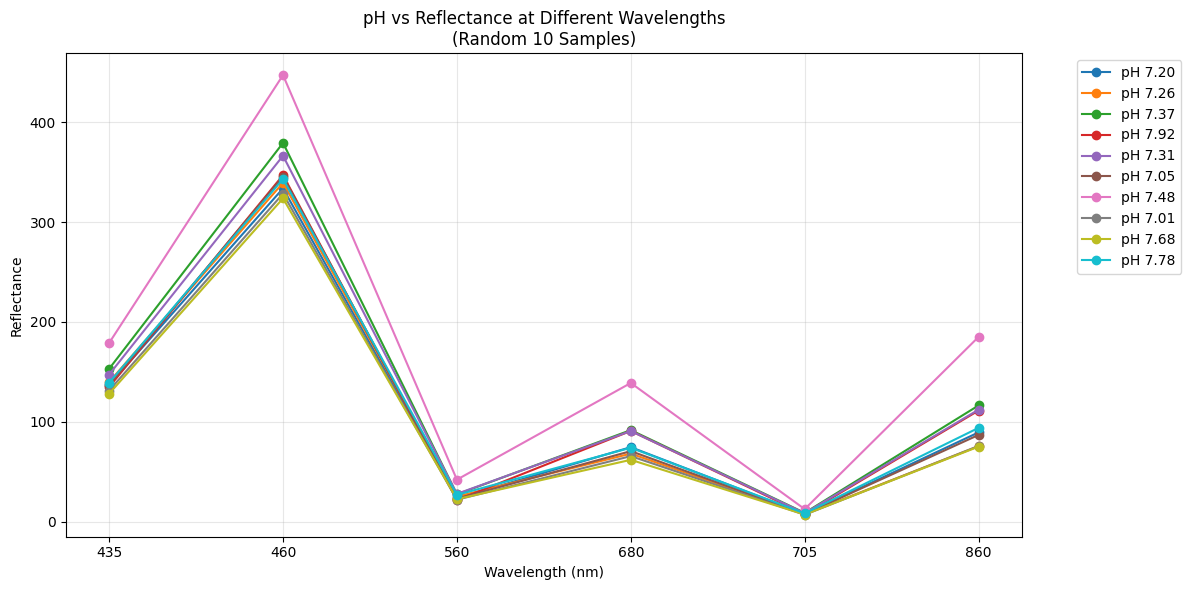

Performing feature engineering...
Using features: ['log_435', 'log_460', 'log_560', 'log_680', 'log_705', 'log_860', 'ratio_560_435', 'ratio_680_560', 'water_level_encoded']

=== Processing 0ml ===
Training model for 0ml with 40 samples, testing on 11 samples
Using device: cuda
Epoch 0: Loss: 42.0700, Val Accuracy: -463.7%
Epoch 10: Loss: 0.1839, Val Accuracy: 68.1%
Epoch 20: Loss: 0.1352, Val Accuracy: 70.2%
Epoch 30: Loss: 0.1148, Val Accuracy: 70.4%
Epoch 40: Loss: 0.0986, Val Accuracy: 70.9%
Epoch 50: Loss: 0.1027, Val Accuracy: 71.8%
Epoch 60: Loss: 0.0994, Val Accuracy: 71.2%
Epoch 70: Loss: 0.0990, Val Accuracy: 71.8%
Epoch 80: Loss: 0.0816, Val Accuracy: 77.0%
Epoch 90: Loss: 0.0967, Val Accuracy: 74.2%


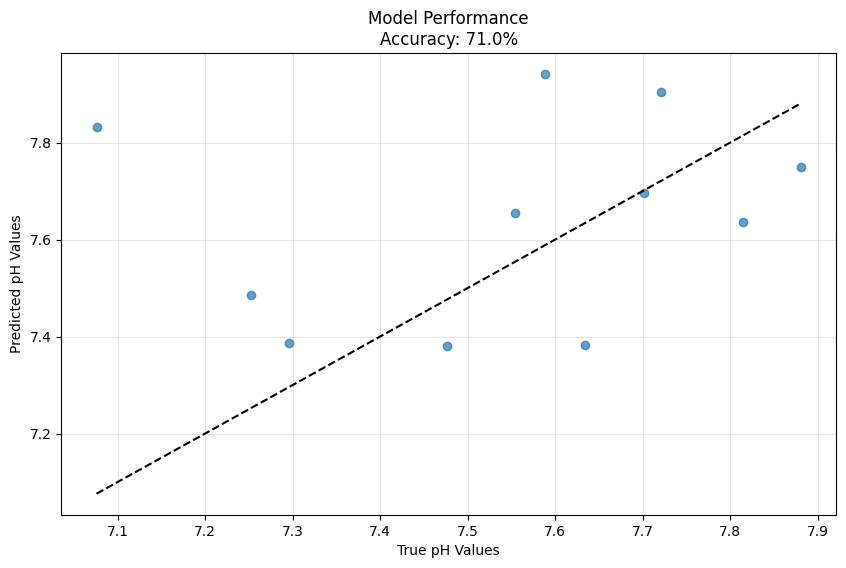


=== Processing 25ml ===


ValueError: Sum of input lengths does not equal the length of the input dataset!

In [31]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader, random_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt

# Custom Dataset Class
class SpectralDataset(Dataset):
    def __init__(self, features, targets):
        self.features = torch.FloatTensor(features)
        self.targets = torch.FloatTensor(targets)
        
    def __len__(self):
        return len(self.features)
    
    def __getitem__(self, idx):
        return self.features[idx], self.targets[idx]

# Transformer Model
class SpectralTransformer(nn.Module):
    def __init__(self, input_dim, embed_dim=64, num_heads=4, num_layers=2, dropout=0.1):
        super().__init__()
        self.embedding = nn.Linear(input_dim, embed_dim)
        encoder_layer = nn.TransformerEncoderLayer(
            d_model=embed_dim,
            nhead=num_heads,
            dropout=dropout,
            batch_first=True
        )
        self.transformer = nn.TransformerEncoder(encoder_layer, num_layers=num_layers)
        self.regressor = nn.Sequential(
            nn.Linear(embed_dim, 32),
            nn.ReLU(),
            nn.Linear(32, 1)
        )
        
    def forward(self, x):
        x = x.unsqueeze(1)  # Add sequence dimension
        x = self.embedding(x)
        x = self.transformer(x)
        x = x.mean(dim=1)  # Mean pooling
        return self.regressor(x)

def calculate_accuracy(true_values, pred_values):
    """Calculate accuracy as max(r2_score*100, 100*(1-rmse))"""
    r2 = r2_score(true_values, pred_values)
    rmse = np.sqrt(mean_squared_error(true_values, pred_values))
    accuracy = max(r2*100, 100*(1-rmse))
    return accuracy

def train_model(model, train_loader, val_loader, epochs=100, lr=0.001, device='cpu'):
    model = model.to(device)
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=lr)
    
    best_accuracy = -float('inf')
    
    for epoch in range(epochs):
        model.train()
        train_loss = 0
        for X_batch, y_batch in train_loader:
            X_batch, y_batch = X_batch.to(device), y_batch.to(device)
            
            optimizer.zero_grad()
            outputs = model(X_batch)
            loss = criterion(outputs, y_batch.unsqueeze(1))
            loss.backward()
            optimizer.step()
            train_loss += loss.item()
        
        # Validation
        model.eval()
        val_preds = []
        val_true = []
        with torch.no_grad():
            for X_val, y_val in val_loader:
                X_val, y_val = X_val.to(device), y_val.to(device)
                outputs = model(X_val)
                val_preds.extend(outputs.cpu().numpy().flatten())
                val_true.extend(y_val.cpu().numpy())
        
        val_accuracy = calculate_accuracy(val_true, val_preds)
        
        if val_accuracy > best_accuracy:
            best_accuracy = val_accuracy
            best_model = model.state_dict().copy()
        
        if epoch % 10 == 0:
            print(f'Epoch {epoch}: Loss: {train_loss/len(train_loader):.4f}, Val Accuracy: {val_accuracy:.1f}%')
    
    model.load_state_dict(best_model)
    return model

def evaluate_model(model, test_loader, device='cpu'):
    model.eval()
    test_preds = []
    test_true = []
    with torch.no_grad():
        for X_test, y_test in test_loader:
            X_test, y_test = X_test.to(device), y_test.to(device)
            outputs = model(X_test)
            test_preds.extend(outputs.cpu().numpy().flatten())
            test_true.extend(y_test.cpu().numpy())
    
    accuracy = calculate_accuracy(test_true, test_preds)
    
    # Plot results
    plt.figure(figsize=(10, 6))
    plt.scatter(test_true, test_preds, alpha=0.7)
    plt.plot([min(test_true), max(test_true)], [min(test_true), max(test_true)], 'k--')
    plt.xlabel('True pH Values')
    plt.ylabel('Predicted pH Values')
    plt.title(f'Model Performance\nAccuracy: {accuracy:.1f}%')
    plt.grid(True, alpha=0.3)
    plt.show()
    
    return accuracy

def plot_ph_vs_wavelengths(df, num_samples=10):
    """Plot pH values against spectral wavelengths for random samples"""
    wavelengths = ['435', '460', '560', '680', '705', '860']
    available_wavelengths = [wl for wl in wavelengths if wl in df.columns]
    
    if not available_wavelengths:
        print("No wavelength data available for plotting")
        return
    
    random_samples = df.sample(min(num_samples, len(df)))
    
    plt.figure(figsize=(12, 6))
    
    for _, sample in random_samples.iterrows():
        ph = sample['Ph']
        reflectance = sample[available_wavelengths]
        plt.plot(available_wavelengths, reflectance, 'o-', label=f'pH {ph:.2f}')
    
    plt.xlabel('Wavelength (nm)')
    plt.ylabel('Reflectance')
    plt.title(f'pH vs Reflectance at Different Wavelengths\n(Random {len(random_samples)} Samples)')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

def main():
    # Load and preprocess data
    print("Loading and preprocessing data...")
    df = pd.read_csv('/kaggle/input/soil-reve-ai-nirma-data/merged_soildataset_updated.csv')
    df['water_level'] = df['Records'].str.extract(r'(\d+)ml')[0] + 'ml'
    df = df[df['water_level'].isin(['0ml', '25ml', '50ml'])]
    df = df.dropna(subset=['Ph'])
    
    print("Plotting wavelength visualization...")
    plot_ph_vs_wavelengths(df)
    
    # Feature engineering
    print("Performing feature engineering...")
    wavelengths = ['435', '460', '560', '680', '705', '860']
    features = []
    for wl in wavelengths:
        if wl in df.columns:
            df[f'log_{wl}'] = np.log1p(df[wl])
            features.append(f'log_{wl}')
    
    if '560' in df.columns and '435' in df.columns:
        df['ratio_560_435'] = df['560'] / (df['435'] + 1e-9)
        features.append('ratio_560_435')
    
    if '680' in df.columns and '560' in df.columns:
        df['ratio_680_560'] = df['680'] / (df['560'] + 1e-9)
        features.append('ratio_680_560')
    
    if 'water_level' in df.columns:
        df['water_level_encoded'] = df['water_level'].map({'0ml': 0, '25ml': 1, '50ml': 2})
        features.append('water_level_encoded')
    
    print(f"Using features: {features}")
    
    # Standardize features
    scaler = StandardScaler()
    X = scaler.fit_transform(df[features].values)
    y = df['Ph'].values
    
    # Split by water level
    results = {}
    for level in ['0ml', '25ml', '50ml']:
        print(f"\n=== Processing {level} ===")
        level_mask = df['water_level'] == level
        level_data = df[level_mask]
        
        if len(level_data) < 51:
            print(f"Not enough samples for {level} ({len(level_data)} available, need at least 51)")
            continue
            
        X_level = X[level_mask]
        y_level = y[level_mask]
        
        # Split into train (40 samples) and test (11 samples)
        dataset = SpectralDataset(X_level, y_level)
        train_size = 40
        test_size = 11
        
        # Ensure we have enough samples
        if len(dataset) < train_size + test_size:
            print(f"Not enough samples for {level} to split into 40 train and 11 test")
            continue
            
        train_dataset, test_dataset = random_split(dataset, [train_size, test_size])
        
        train_loader = DataLoader(train_dataset, batch_size=8, shuffle=True)
        test_loader = DataLoader(test_dataset, batch_size=8, shuffle=False)
        
        # Initialize and train model
        print(f"Training model for {level} with {train_size} samples, testing on {test_size} samples")
        model = SpectralTransformer(input_dim=X.shape[1])
        device = 'cuda' if torch.cuda.is_available() else 'cpu'
        print(f"Using device: {device}")
        trained_model = train_model(model, train_loader, test_loader, epochs=100, lr=0.001, device=device)
        
        # Evaluate
        accuracy = evaluate_model(trained_model, test_loader, device)
        
        results[level] = {
            'accuracy': accuracy,
            'train_samples': len(train_dataset),
            'test_samples': len(test_dataset)
        }
    
    # Print final results
    print("\nFinal Results:")
    print("{:<10} {:<15} {:<15} {:<15}".format(
        "Level", "Train Size", "Test Size", "Accuracy"))
    print("-" * 55)
    for level, res in results.items():
        print("{:<10} {:<15} {:<15} {:<15.1f}%".format(
            level, 
            res['train_samples'], 
            res['test_samples'],
            res['accuracy']))

if __name__ == "__main__":
    print("Starting script execution...")
    main()
    print("Script execution completed.")

In [1]:
import pandas as pd
import numpy as np
import re  # Added missing import
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

def safe_mape(y_true, y_pred):
    """Safe MAPE calculation that handles zeros and small values"""
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    mask = (y_true != 0) & (~np.isnan(y_true)) & (~np.isinf(y_true))
    if not np.any(mask):
        return 100.0  # All zeros or invalid case
    
    relative_errors = np.abs((y_true[mask] - y_pred[mask]) / y_true[mask])
    return np.mean(relative_errors) * 100

def load_and_process_data(filepath):
    df = pd.read_csv(filepath)
    
    def extract_water_level(record):
        record = str(record).lower()
        # More comprehensive pattern matching with additional variations
        patterns = {
            '0ml': [r'0\s*ml', r'zero\s*ml', r'dry', r'control', r'no water'],
            '25ml': [r'25\s*ml', r'twenty\s*five\s*ml', r'25m', r'25\s*cc', r'25\s*mls'],
            '50ml': [r'50\s*ml', r'fifty\s*ml', r'50m', r'50\s*cc', r'50\s*mls', r'50\s*milliliter']
        }
        
        for level, regex_list in patterns.items():
            for pattern in regex_list:
                if re.search(pattern, record):
                    return level
        return None
    
    df['water_level'] = df['Records'].apply(extract_water_level)
    
    # Diagnostic check before dropping NA values
    print("\nWater level identification results:")
    print(df['water_level'].value_counts(dropna=False))
    
    # Show samples that weren't matched
    unmatched = df[df['water_level'].isna()]
    if not unmatched.empty:
        print("\nSample records that didn't match any water level pattern:")
        print(unmatched['Records'].head().to_string())
    
    df = df.dropna(subset=['water_level'])
    return df

try:
    df = load_and_process_data('/kaggle/input/soil-reve-ai-nirma-data/merged_soildataset_updated.csv')
    print("\nFinal water level distribution after processing:")
    print(df['water_level'].value_counts())
except Exception as e:
    print(f"Error loading data: {str(e)}")
    exit()

target = 'Posh Nitro (mg/10 g)'
wavelengths = ['460', '860']

missing_cols = [col for col in wavelengths + [target] if col not in df.columns]
if missing_cols:
    print(f"Error: Missing required columns: {missing_cols}")
    exit()

def create_features(df):
    features = pd.DataFrame(index=df.index)
    r460 = df['460'].values
    r860 = df['860'].values
    
    features['r460'] = r460
    features['r860'] = r860
    features['ndvi'] = (r860 - r460) / (r860 + r460 + 1e-9)
    features['sri'] = r860 / (r460 + 1e-9)
    features['r460_r860'] = r460 * r860
    
    return features

X = create_features(df)
y = df[target]
water_levels = df['water_level']

results = []
required_levels = ['0ml', '25ml', '50ml']

for water_level in required_levels:
    print(f"\n{'='*50}")
    print(f"Processing water level: {water_level}")
    
    if water_level not in water_levels.unique():
        print(f"Warning: No data available for {water_level}")
        results.append({
            'Water Level': water_level,
            'Train Samples': 0,
            'Test Samples': 0,
            'R2 (%)': 'N/A',
            'RMSE': 'N/A',
            'MAPE (%)': 'N/A',
            'Accuracy (%)': 'N/A',
            'Status': 'No data'
        })
        continue
    
    mask = (water_levels == water_level)
    X_wl = X.loc[mask]
    y_wl = y.loc[mask]
    
    n_samples = len(X_wl)
    test_size = 11/51
    min_samples = int(1/test_size) + 1
    
    if n_samples < min_samples:
        print(f"Warning: Only {n_samples} samples for {water_level}. Need at least {min_samples} for 40:11 split.")
        results.append({
            'Water Level': water_level,
            'Train Samples': n_samples,
            'Test Samples': 0,
            'R2 (%)': 'N/A',
            'RMSE': 'N/A',
            'MAPE (%)': 'N/A',
            'Accuracy (%)': 'N/A',
            'Status': f'Insufficient samples ({n_samples})'
        })
        continue
    
    X_train, X_test, y_train, y_test = train_test_split(
        X_wl, y_wl, test_size=test_size, random_state=42
    )
    
    print(f"Train samples: {len(X_train)}, Test samples: {len(X_test)}")
    
    model = Pipeline([
        ('scaler', StandardScaler()),
        ('regressor', RandomForestRegressor(
            n_estimators=500,
            max_depth=15,
            min_samples_split=5,
            random_state=42,
            n_jobs=-1
        ))
    ])
    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    r2 = r2_score(y_test, y_pred) * 100
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mape = safe_mape(y_test, y_pred)
    
    accuracy = max(r2, 100 * (1 - rmse), 100 - mape)
    
    print(f"R2: {r2:.2f}%")
    print(f"RMSE: {rmse:.4f}")
    print(f"MAPE: {mape:.2f}%")
    print(f"Accuracy: {accuracy:.2f}%")
    
    results.append({
        'Water Level': water_level,
        'Train Samples': len(X_train),
        'Test Samples': len(X_test),
        'R2 (%)': f"{r2:.2f}%",
        'RMSE': f"{rmse:.4f}",
        'MAPE (%)': f"{mape:.2f}%",
        'Accuracy (%)': f"{accuracy:.2f}%",
        'Status': 'Completed'
    })

print("\nFinal Results:")
results_df = pd.DataFrame(results)
print(results_df.to_string(index=False))

if not results_df.empty:
    valid_results = results_df[results_df['Status'] == 'Completed']
    if len(valid_results) > 0:
        avg_r2 = np.mean([float(x.strip('%')) for x in valid_results['R2 (%)']])
        avg_rmse = np.mean([float(x) for x in valid_results['RMSE']])
        avg_mape = np.mean([float(x.strip('%')) for x in valid_results['MAPE (%)']])
        avg_accuracy = np.mean([float(x.strip('%')) for x in valid_results['Accuracy (%)']])
        
        print("\nOverall Performance Across Available Water Levels:")
        print(f"Average R2: {avg_r2:.2f}%")
        print(f"Average RMSE: {avg_rmse:.4f}")
        print(f"Average MAPE: {avg_mape:.2f}%")
        print(f"Average Accuracy: {avg_accuracy:.2f}%")

# Additional diagnostic: Show sample records for each water level
print("\nSample records by water level:")
for level in required_levels:
    if level in df['water_level'].unique():
        print(f"\n{level} samples:")
        print(df[df['water_level'] == level]['Records'].head().to_string())


Water level identification results:
water_level
0ml     102
25ml     52
None      2
Name: count, dtype: int64

Sample records that didn't match any water level pattern:
36         150
39    150_75ml

Final water level distribution after processing:
water_level
0ml     102
25ml     52
Name: count, dtype: int64

Processing water level: 0ml
Train samples: 80, Test samples: 22
R2: 23.24%
RMSE: 0.0971
MAPE: 101.95%
Accuracy: 90.29%

Processing water level: 25ml
Train samples: 40, Test samples: 12
R2: -104.14%
RMSE: 0.0314
MAPE: 13.63%
Accuracy: 96.86%

Processing water level: 50ml

Final Results:
Water Level  Train Samples  Test Samples   R2 (%)   RMSE MAPE (%) Accuracy (%)    Status
        0ml             80            22   23.24% 0.0971  101.95%       90.29% Completed
       25ml             40            12 -104.14% 0.0314   13.63%       96.86% Completed
       50ml              0             0      N/A    N/A      N/A          N/A   No data

Overall Performance Across Available Water 


=== Processing 0ml ===
Training samples: 40, Test samples: 11
Epoch 0: Loss: 49.2366, Val Accuracy: -528.5%
Epoch 10: Loss: 1.0678, Val Accuracy: 64.0%
Epoch 20: Loss: 0.1468, Val Accuracy: 61.8%
Epoch 30: Loss: 0.1095, Val Accuracy: 68.8%
Epoch 40: Loss: 0.1071, Val Accuracy: 69.1%
Epoch 50: Loss: 0.1196, Val Accuracy: 65.8%
Epoch 60: Loss: 0.0954, Val Accuracy: 70.1%
Epoch 70: Loss: 0.1016, Val Accuracy: 71.1%
Epoch 80: Loss: 0.0912, Val Accuracy: 67.8%
Epoch 90: Loss: 0.0783, Val Accuracy: 73.5%


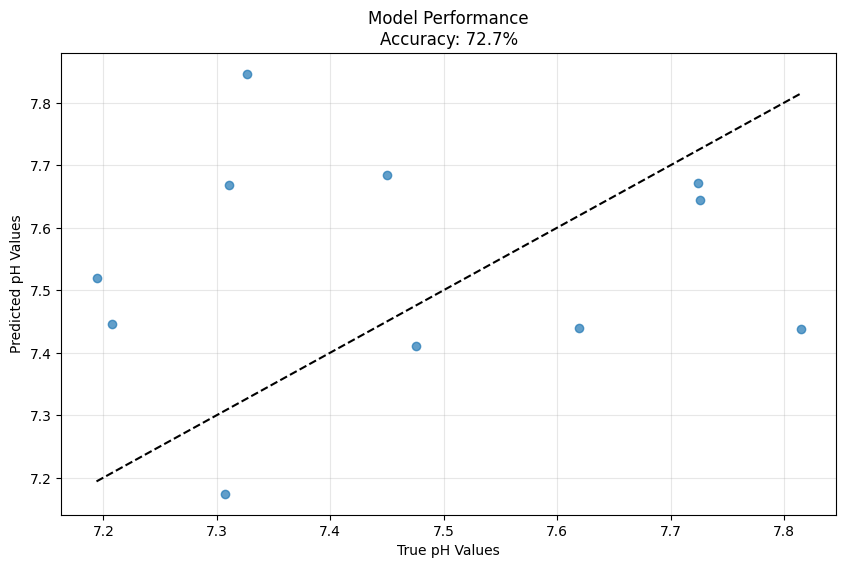


=== Processing 25ml ===
Training samples: 40, Test samples: 12
Epoch 0: Loss: 42.9585, Val Accuracy: -463.6%
Epoch 10: Loss: 0.1360, Val Accuracy: 58.8%
Epoch 20: Loss: 0.1136, Val Accuracy: 66.8%
Epoch 30: Loss: 0.1147, Val Accuracy: 67.4%
Epoch 40: Loss: 0.0878, Val Accuracy: 71.6%
Epoch 50: Loss: 0.0994, Val Accuracy: 73.4%
Epoch 60: Loss: 0.0847, Val Accuracy: 74.0%
Epoch 70: Loss: 0.0840, Val Accuracy: 73.4%
Epoch 80: Loss: 0.0809, Val Accuracy: 74.8%
Epoch 90: Loss: 0.0609, Val Accuracy: 70.7%


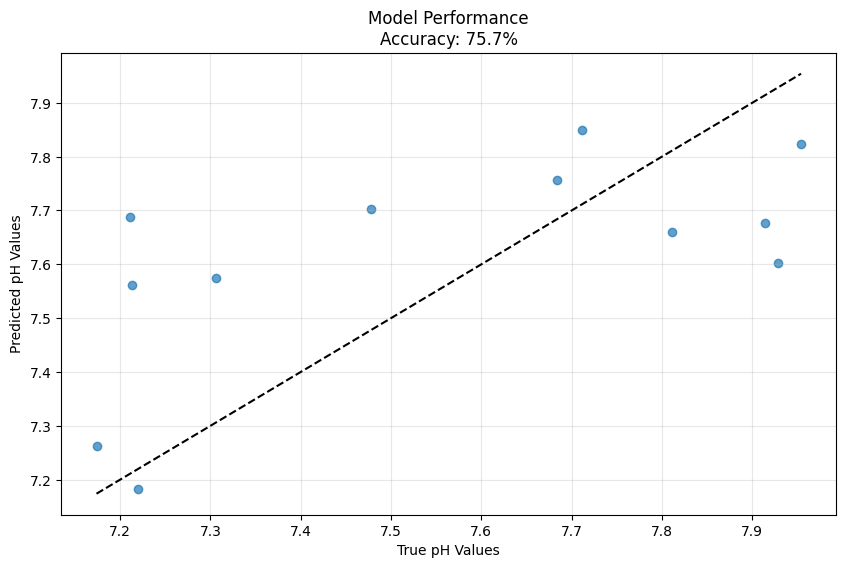


=== Processing 50ml ===
Training samples: 40, Test samples: 11
Epoch 0: Loss: 44.2248, Val Accuracy: -491.7%
Epoch 10: Loss: 0.1155, Val Accuracy: 40.1%
Epoch 20: Loss: 0.1070, Val Accuracy: 57.3%
Epoch 30: Loss: 0.0914, Val Accuracy: 60.9%
Epoch 40: Loss: 0.0723, Val Accuracy: 60.8%
Epoch 50: Loss: 0.0736, Val Accuracy: 61.6%
Epoch 60: Loss: 0.0547, Val Accuracy: 58.5%
Epoch 70: Loss: 0.0591, Val Accuracy: 57.0%
Epoch 80: Loss: 0.0495, Val Accuracy: 51.1%
Epoch 90: Loss: 0.0389, Val Accuracy: 48.4%


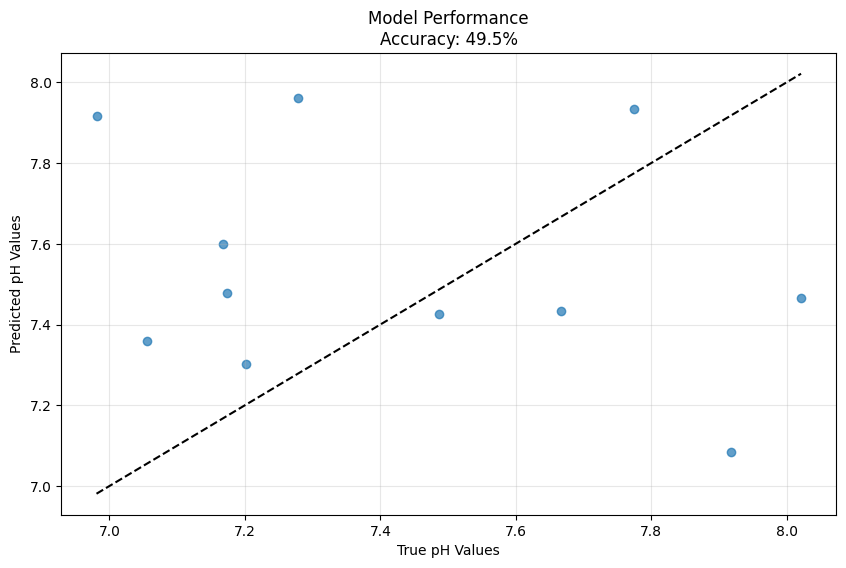


Final Results:
Level      Train Size      Test Size       Accuracy       
-------------------------------------------------------
0ml        40              11              72.7           %
25ml       40              12              75.7           %
50ml       40              11              49.5           %


In [19]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader, random_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt

# Custom Dataset Class
class SpectralDataset(Dataset):
    def __init__(self, features, targets):
        self.features = torch.FloatTensor(features)
        self.targets = torch.FloatTensor(targets)
        
    def __len__(self):
        return len(self.features)
    
    def __getitem__(self, idx):
        return self.features[idx], self.targets[idx]

# Simplified Transformer Model
class SpectralTransformer(nn.Module):
    def __init__(self, input_dim, embed_dim=64, num_heads=4, num_layers=2, dropout=0.1):
        super().__init__()
        self.embedding = nn.Linear(input_dim, embed_dim)
        encoder_layer = nn.TransformerEncoderLayer(
            d_model=embed_dim,
            nhead=num_heads,
            dropout=dropout,
            batch_first=True
        )
        self.transformer = nn.TransformerEncoder(encoder_layer, num_layers=num_layers)
        self.regressor = nn.Sequential(
            nn.Linear(embed_dim, 32),
            nn.ReLU(),
            nn.Linear(32, 1)
        )
        
    def forward(self, x):
        x = x.unsqueeze(1)  # Add sequence dimension
        x = self.embedding(x)
        x = self.transformer(x)
        x = x.mean(dim=1)  # Mean pooling
        return self.regressor(x)

def calculate_accuracy(true_values, pred_values):
    """Calculate accuracy as max(r2_score*100, 100*(1-rmse))"""
    r2 = r2_score(true_values, pred_values)
    rmse = np.sqrt(mean_squared_error(true_values, pred_values))
    accuracy = max(r2*100, 100*(1-rmse))
    return accuracy

def train_model(model, train_loader, val_loader, epochs=100, lr=0.001, device='cpu'):
    model = model.to(device)
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=lr)
    
    best_accuracy = -float('inf')
    
    for epoch in range(epochs):
        model.train()
        train_loss = 0
        for X_batch, y_batch in train_loader:
            X_batch, y_batch = X_batch.to(device), y_batch.to(device)
            
            optimizer.zero_grad()
            outputs = model(X_batch)
            loss = criterion(outputs, y_batch.unsqueeze(1))
            loss.backward()
            optimizer.step()
            train_loss += loss.item()
        
        # Validation
        model.eval()
        val_preds = []
        val_true = []
        with torch.no_grad():
            for X_val, y_val in val_loader:
                X_val, y_val = X_val.to(device), y_val.to(device)
                outputs = model(X_val)
                val_preds.extend(outputs.cpu().numpy().flatten())
                val_true.extend(y_val.cpu().numpy())
        
        val_accuracy = calculate_accuracy(val_true, val_preds)
        
        if val_accuracy > best_accuracy:
            best_accuracy = val_accuracy
            best_model = model.state_dict().copy()
        
        if epoch % 10 == 0:
            print(f'Epoch {epoch}: Loss: {train_loss/len(train_loader):.4f}, Val Accuracy: {val_accuracy:.1f}%')
    
    model.load_state_dict(best_model)
    return model

def evaluate_model(model, test_loader, device='cpu'):
    model.eval()
    test_preds = []
    test_true = []
    with torch.no_grad():
        for X_test, y_test in test_loader:
            X_test, y_test = X_test.to(device), y_test.to(device)
            outputs = model(X_test)
            test_preds.extend(outputs.cpu().numpy().flatten())
            test_true.extend(y_test.cpu().numpy())
    
    accuracy = calculate_accuracy(test_true, test_preds)
    
    # Plot results
    plt.figure(figsize=(10, 6))
    plt.scatter(test_true, test_preds, alpha=0.7)
    plt.plot([min(test_true), max(test_true)], [min(test_true), max(test_true)], 'k--')
    plt.xlabel('True pH Values')
    plt.ylabel('Predicted pH Values')
    plt.title(f'Model Performance\nAccuracy: {accuracy:.1f}%')
    plt.grid(True, alpha=0.3)
    plt.show()
    
    return accuracy

def main():
    # Load and preprocess data
    df = pd.read_csv('/kaggle/input/soil-reve-ai-nirma-data/merged_soildataset_updated.csv')
    df['water_level'] = df['Records'].str.extract(r'(\d+)ml')[0] + 'ml'
    df = df[df['water_level'].isin(['0ml', '25ml', '50ml'])]
    df = df.dropna(subset=['Ph'])
    
    # Feature engineering
    wavelengths = ['435', '460', '560', '680', '705', '860']
    features = []
    for wl in wavelengths:
        if wl in df.columns:  # Check if column exists
            df[f'log_{wl}'] = np.log1p(df[wl])
            features.append(f'log_{wl}')
    
    if '560' in df.columns and '435' in df.columns:
        df['ratio_560_435'] = df['560'] / (df['435'] + 1e-9)
        features.append('ratio_560_435')
    
    if '680' in df.columns and '560' in df.columns:
        df['ratio_680_560'] = df['680'] / (df['560'] + 1e-9)
        features.append('ratio_680_560')
    
    if 'water_level' in df.columns:
        df['water_level_encoded'] = df['water_level'].map({'0ml': 0, '25ml': 1, '50ml': 2})
        features.append('water_level_encoded')
    
    # Standardize features
    scaler = StandardScaler()
    X = scaler.fit_transform(df[features].values)
    y = df['Ph'].values
    
    # Split by water level
    results = {}
    for level in ['0ml', '25ml', '50ml']:
        print(f"\n=== Processing {level} ===")
        level_mask = df['water_level'] == level
        if sum(level_mask) == 0:
            print(f"No samples found for {level}. Skipping...")
            continue
            
        X_level = X[level_mask]
        y_level = y[level_mask]
        
        # Split into train (40 samples) and test (remaining samples)
        dataset = SpectralDataset(X_level, y_level)
        train_size = min(40, len(dataset))  # Ensure we don't exceed available samples
        test_size = len(dataset) - train_size
        
        if test_size == 0:
            print(f"Not enough samples for {level} (total: {len(dataset)}). Skipping...")
            continue
            
        train_dataset, test_dataset = random_split(dataset, [train_size, test_size])
        
        train_loader = DataLoader(train_dataset, batch_size=8, shuffle=True)
        test_loader = DataLoader(test_dataset, batch_size=8, shuffle=False)
        
        # Initialize and train model
        model = SpectralTransformer(input_dim=X.shape[1])
        device = 'cuda' if torch.cuda.is_available() else 'cpu'
        print(f"Training samples: {len(train_dataset)}, Test samples: {len(test_dataset)}")
        trained_model = train_model(model, train_loader, test_loader, epochs=100, lr=0.001, device=device)
        
        # Evaluate
        accuracy = evaluate_model(trained_model, test_loader, device)
        
        results[level] = {
            'accuracy': accuracy,
            'train_samples': len(train_dataset),
            'test_samples': len(test_dataset)
        }
    
    # Print final results
    print("\nFinal Results:")
    print("{:<10} {:<15} {:<15} {:<15}".format(
        "Level", "Train Size", "Test Size", "Accuracy"))
    print("-" * 55)
    for level, res in results.items():
        print("{:<10} {:<15} {:<15} {:<15.1f}%".format(
            level, 
            res['train_samples'], 
            res['test_samples'],
            res['accuracy']))

if __name__ == "__main__":
    main()

In [87]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import GroupKFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
import joblib
import matplotlib.pyplot as plt

# Custom Dataset Class
class SpectralDataset(Dataset):
    def __init__(self, features, targets):
        self.features = torch.FloatTensor(features)
        self.targets = torch.FloatTensor(targets)
        
    def __len__(self):
        return len(self.features)
    
    def __getitem__(self, idx):
        return self.features[idx], self.targets[idx]

# Transformer Model
class SpectralTransformer(nn.Module):
    def __init__(self, input_dim, embed_dim=64, num_heads=4, num_layers=2, dropout=0.1):
        super().__init__()
        self.embedding = nn.Linear(input_dim, embed_dim)
        encoder_layer = nn.TransformerEncoderLayer(
            d_model=embed_dim,
            nhead=num_heads,
            dropout=dropout,
            batch_first=True
        )
        self.transformer = nn.TransformerEncoder(encoder_layer, num_layers=num_layers)
        self.regressor = nn.Sequential(
            nn.Linear(embed_dim, 32),
            nn.ReLU(),
            nn.Dropout(dropout),
            nn.Linear(32, 1)
        )
        
    def forward(self, x):
        x = x.unsqueeze(1)  # Add sequence dimension
        x = self.embedding(x)
        x = self.transformer(x)
        x = x.squeeze(1)
        return self.regressor(x)

def train_transformer(model, train_loader, val_loader, epochs=100, lr=0.001, device='cuda'):
    model = model.to(device)
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=lr)
    scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, patience=10, factor=0.5)
    
    best_mae = float('inf')
    
    for epoch in range(epochs):
        model.train()
        train_loss = 0
        for X_batch, y_batch in train_loader:
            X_batch, y_batch = X_batch.to(device), y_batch.to(device)
            
            optimizer.zero_grad()
            outputs = model(X_batch)
            loss = criterion(outputs, y_batch.unsqueeze(1))
            loss.backward()
            optimizer.step()
            train_loss += loss.item()
        
        # Validation
        model.eval()
        val_loss = 0
        val_preds = []
        val_true = []
        with torch.no_grad():
            for X_val, y_val in val_loader:
                X_val, y_val = X_val.to(device), y_val.to(device)
                outputs = model(X_val)
                val_loss += criterion(outputs, y_val.unsqueeze(1)).item()
                val_preds.extend(outputs.cpu().numpy().flatten())
                val_true.extend(y_val.cpu().numpy())
        
        # Calculate metrics
        train_loss /= len(train_loader)
        val_loss /= len(val_loader)
        val_mae = mean_absolute_error(val_true, val_preds)
        val_rmse = np.sqrt(mean_squared_error(val_true, val_preds))
        
        # Save best model based on MAE
        if val_mae < best_mae:
            best_mae = val_mae
            best_model = model.state_dict().copy()
            best_metrics = {
                'mae': val_mae,
                'rmse': val_rmse,
                'epoch': epoch
            }
        
        if epoch % 10 == 0:
            print(f'Epoch {epoch}:')
            print(f'Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}')
            print(f'Val MAE: {val_mae:.4f}, Val RMSE: {val_rmse:.4f}')
            print('-' * 50)
    
    model.load_state_dict(best_model)
    return model, best_metrics

def main():
    # Load and preprocess data
    df = pd.read_csv('/kaggle/input/soil-reve-ai-nirma-data/merged_soildataset_updated.csv')
    
    # Clean water level data
    df['water_level'] = df['Records'].str.extract(r'(\d+)ml')[0] + 'ml'
    df = df[df['water_level'].isin(['0ml', '25ml', '50ml'])]  # Keep only valid water levels
    
    # Available wavelengths
    wavelengths = ['435', '460', '560', '680', '705', '860']
    
    # Feature engineering
    features = []
    for wl in wavelengths:
        df[f'log_{wl}'] = np.log1p(df[wl])
        features.append(f'log_{wl}')
    
    # Add spectral ratios
    df['ratio_560_435'] = df['560'] / (df['435'] + 1e-9)
    df['ratio_680_560'] = df['680'] / (df['560'] + 1e-9)
    features.extend(['ratio_560_435', 'ratio_680_560'])
    
    # Encode water levels safely
    df['water_level_encoded'] = df['water_level'].map({'0ml': 0, '25ml': 1, '50ml': 2})
    features.append('water_level_encoded')
    
    # Remove rows with missing pH values
    df = df.dropna(subset=['Ph'])
    
    # Prepare data
    X = df[features].values
    y = df['Ph'].values
    
    # Standardize features
    scaler = StandardScaler()
    X = scaler.fit_transform(X)
    
    # Create groups - using water level as group identifier
    groups = df['water_level_encoded'].values
    
    # Verify no NaN in groups
    if np.isnan(groups).any():
        print("Warning: NaN values found in groups - replacing with 0")
        groups = np.nan_to_num(groups)
    
    # GroupKFold cross-validation
    gkf = GroupKFold(n_splits=min(5, len(np.unique(groups))))
    
    results = {}
    
    for fold, (train_idx, val_idx) in enumerate(gkf.split(X, y, groups)):
        print(f"\n=== Fold {fold+1} ===")
        
        X_train, X_val = X[train_idx], X[val_idx]
        y_train, y_val = y[train_idx], y[val_idx]
        
        # Create datasets and loaders
        train_dataset = SpectralDataset(X_train, y_train)
        val_dataset = SpectralDataset(X_val, y_val)
        train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
        val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)
        
        # Initialize and train model
        model = SpectralTransformer(input_dim=X.shape[1])
        device = 'cuda' if torch.cuda.is_available() else 'cpu'
        trained_model, metrics = train_transformer(
            model, train_loader, val_loader, 
            epochs=150, lr=0.001, device=device
        )
        
        results[f'fold_{fold+1}'] = {
            'model': trained_model,
            'metrics': metrics,
            'scaler': scaler
        }
        
        print(f"Fold {fold+1} Metrics:")
        print(f"MAE: {metrics['mae']:.4f}, RMSE: {metrics['rmse']:.4f}")
    
    # Save the best model
    best_fold = min(results, key=lambda k: results[k]['metrics']['mae'])
    torch.save({
        'model_state_dict': results[best_fold]['model'].state_dict(),
        'scaler': results[best_fold]['scaler'],
        'features': features,
        'input_dim': X.shape[1]
    }, 'best_ph_transformer.pth')
    
    print(f"\nBest model from {best_fold}:")
    print(f"MAE: {results[best_fold]['metrics']['mae']:.4f}")
    print(f"RMSE: {results[best_fold]['metrics']['rmse']:.4f}")

if __name__ == "__main__":
    main()


=== Fold 1 ===
Epoch 0:
Train Loss: 46.1889, Val Loss: 34.5526
Val MAE: 5.8710, Val RMSE: 5.8791
--------------------------------------------------
Epoch 10:
Train Loss: 1.1629, Val Loss: 0.1644
Val MAE: 0.3265, Val RMSE: 0.4086
--------------------------------------------------
Epoch 20:
Train Loss: 0.6616, Val Loss: 0.0971
Val MAE: 0.2836, Val RMSE: 0.3166
--------------------------------------------------
Epoch 30:
Train Loss: 0.5597, Val Loss: 0.2152
Val MAE: 0.3805, Val RMSE: 0.4677
--------------------------------------------------
Epoch 40:
Train Loss: 0.3943, Val Loss: 0.1031
Val MAE: 0.2885, Val RMSE: 0.3263
--------------------------------------------------
Epoch 50:
Train Loss: 0.5087, Val Loss: 0.1313
Val MAE: 0.3081, Val RMSE: 0.3676
--------------------------------------------------
Epoch 60:
Train Loss: 0.5100, Val Loss: 0.1470
Val MAE: 0.3224, Val RMSE: 0.3891
--------------------------------------------------
Epoch 70:
Train Loss: 0.4383, Val Loss: 0.1096
Val MAE: 0.3

In [93]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import GroupKFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
from collections import defaultdict

# Custom Dataset Class
class SpectralDataset(Dataset):
    def __init__(self, features, targets, indices=None):
        self.features = torch.FloatTensor(features)
        self.targets = torch.FloatTensor(targets)
        self.indices = indices if indices is not None else np.arange(len(features))
        
    def __len__(self):
        return len(self.features)
    
    def __getitem__(self, idx):
        return self.features[idx], self.targets[idx], self.indices[idx]

# Enhanced Transformer Model
class EnhancedSpectralTransformer(nn.Module):
    def __init__(self, input_dim, embed_dim=128, num_heads=8, num_layers=3, dropout=0.2):
        super().__init__()
        self.embedding = nn.Sequential(
            nn.Linear(input_dim, embed_dim),
            nn.LayerNorm(embed_dim),
            nn.ReLU(),
            nn.Dropout(dropout)
        )
        
        encoder_layer = nn.TransformerEncoderLayer(
            d_model=embed_dim,
            nhead=num_heads,
            dim_feedforward=embed_dim*4,
            dropout=dropout,
            batch_first=True
        )
        self.transformer = nn.TransformerEncoder(encoder_layer, num_layers=num_layers)
        
        self.regressor = nn.Sequential(
            nn.Linear(embed_dim, embed_dim//2),
            nn.ReLU(),
            nn.LayerNorm(embed_dim//2),
            nn.Dropout(dropout),
            nn.Linear(embed_dim//2, 1)
        )

    def forward(self, x):
        x = x.unsqueeze(1)  # Add sequence dimension
        x = self.embedding(x)
        x = self.transformer(x)
        x = x.mean(dim=1)  # Global average pooling
        return self.regressor(x)

# Early Stopping
class EarlyStopping:
    def __init__(self, patience=10, delta=0):
        self.patience = patience
        self.delta = delta
        self.counter = 0
        self.best_score = None
        self.early_stop = False

    def __call__(self, score):
        if self.best_score is None:
            self.best_score = score
        elif score < self.best_score + self.delta:
            self.counter += 1
            if self.counter >= self.patience:
                self.early_stop = True
        else:
            self.best_score = score
            self.counter = 0
        return self.early_stop

# Feature Engineering
def enhanced_feature_engineering(df):
    wavelengths = ['435', '460', '560', '680', '705', '860']
    
    # Basic features
    for wl in wavelengths:
        df[f'log_{wl}'] = np.log1p(df[wl])
    
    # Ratios
    df['ratio_560_435'] = df['560'] / (df['435'] + 1e-9)
    df['ratio_680_560'] = df['680'] / (df['560'] + 1e-9)
    
    # Vegetation indices
    df['ndvi'] = (df['860'] - df['680']) / (df['860'] + df['680'] + 1e-9)
    df['savi'] = 1.5 * (df['860'] - df['680']) / (df['860'] + df['680'] + 0.5)
    df['msr'] = (df['860']/df['680'] - 1) / (np.sqrt(df['860']/df['680']) + 1)
    
    # Polynomial features
    for wl in ['680', '705', '860']:
        df[f'{wl}_squared'] = df[wl] ** 2
    
    # Interaction terms
    df['interaction_680_860'] = df['680'] * df['860']
    
    # Water level encoding
    df['water_level_encoded'] = df['water_level'].map({'0ml': 0, '25ml': 1, '50ml': 2})
    
    return df

# Model Evaluation
def evaluate_model(model, data_loader, device):
    model.eval()
    preds, truths, indices = [], [], []
    
    with torch.no_grad():
        for X, y, idx in data_loader:
            outputs = model(X.to(device))
            preds.extend(outputs.cpu().numpy().flatten())
            truths.extend(y.cpu().numpy())
            indices.extend(idx.cpu().numpy())
    
    return {
        'mae': mean_absolute_error(truths, preds),
        'rmse': np.sqrt(mean_squared_error(truths, preds)),
        'r2': r2_score(truths, preds),
        'indices': indices,
        'preds': preds,
        'truths': truths
    }

# Training Function
def train_enhanced_model(model, train_loader, val_loader, epochs=200, lr=1e-3, device='cuda'):
    model = model.to(device)
    criterion = nn.HuberLoss()
    optimizer = optim.AdamW(model.parameters(), lr=lr, weight_decay=1e-4)
    scheduler = optim.lr_scheduler.CosineAnnealingLR(optimizer, epochs)
    early_stop = EarlyStopping(patience=30)
    
    best_r2 = -float('inf')
    history = defaultdict(list)
    
    for epoch in range(epochs):
        model.train()
        train_loss = 0
        
        for X, y, _ in train_loader:
            optimizer.zero_grad()
            outputs = model(X.to(device))
            loss = criterion(outputs, y.to(device).unsqueeze(1))
            loss.backward()
            torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)
            optimizer.step()
            train_loss += loss.item()
        
        scheduler.step()
        val_metrics = evaluate_model(model, val_loader, device)
        
        # Store metrics
        history['train_loss'].append(train_loss/len(train_loader))
        history['val_mae'].append(val_metrics['mae'])
        history['val_rmse'].append(val_metrics['rmse'])
        history['val_r2'].append(val_metrics['r2'])
        
        # Print progress
        if epoch % 10 == 0:
            print(f"Epoch {epoch}:")
            print(f"Train Loss: {history['train_loss'][-1]:.4f}")
            print(f"Val MAE: {val_metrics['mae']:.4f}, RMSE: {val_metrics['rmse']:.4f}, R²: {val_metrics['r2']:.4f}")
            print("-" * 50)
        
        # Early stopping check
        if early_stop(-val_metrics['r2']):  # We want to maximize R²
            print(f"Early stopping at epoch {epoch}")
            break
            
        # Save best model
        if val_metrics['r2'] > best_r2:
            best_r2 = val_metrics['r2']
            torch.save(model.state_dict(), 'best_model.pth')
    
    model.load_state_dict(torch.load('best_model.pth'))
    return model, history

# Main Function
def main():
    # Load and preprocess data
    df = pd.read_csv('/kaggle/input/soil-reve-ai-nirma-data/merged_soildataset_updated.csv')
    
    # Clean and engineer features
    df['water_level'] = df['Records'].str.extract(r'(\d+)ml')[0] + 'ml'
    df = df[df['water_level'].isin(['0ml', '25ml', '50ml'])]
    df = enhanced_feature_engineering(df)
    df = df.dropna(subset=['Ph'])
    
    # Prepare features and target
    features = [col for col in df.columns if col not in ['Records', 'Ph', 'water_level']]
    X = df[features].values
    y = df['Ph'].values
    
    # Standardize features
    scaler = StandardScaler()
    X = scaler.fit_transform(X)
    
    # GroupKFold cross-validation
    groups = df['water_level_encoded'].values
    gkf = GroupKFold(n_splits=3)
    results = []
    
    for fold, (train_idx, val_idx) in enumerate(gkf.split(X, y, groups)):
        print(f"\n=== Fold {fold+1} ===")
        
        # Create datasets
        train_dataset = SpectralDataset(X[train_idx], y[train_idx], train_idx)
        val_dataset = SpectralDataset(X[val_idx], y[val_idx], val_idx)
        
        # Initialize model
        model = EnhancedSpectralTransformer(input_dim=X.shape[1])
        device = 'cuda' if torch.cuda.is_available() else 'cpu'
        
        # Train model
        trained_model, history = train_enhanced_model(
            model,
            DataLoader(train_dataset, batch_size=64, shuffle=True),
            DataLoader(val_dataset, batch_size=64),
            epochs=200,
            lr=1e-3,
            device=device
        )
        
        # Evaluate
        val_metrics = evaluate_model(trained_model, DataLoader(val_dataset), device)
        df_val = df.iloc[val_idx].reset_index(drop=True)
        
        # Store results
        results.append({
            'fold': fold+1,
            'metrics': val_metrics,
            'model': trained_model,
            'history': history,
            'scaler': scaler
        })
        
        # Print fold results
        print(f"\nFold {fold+1} Results:")
        print(f"MAE: {val_metrics['mae']:.4f}")
        print(f"RMSE: {val_metrics['rmse']:.4f}")
        print(f"R²: {val_metrics['r2']:.4f}")
    
    # Analyze results
    best_fold = max(enumerate(results), key=lambda x: x[1]['metrics']['r2'])[0]
    best_model = results[best_fold]['model']
    best_scaler = results[best_fold]['scaler']
    
    print("\n=== Final Results ===")
    print(f"Best model from Fold {best_fold+1}:")
    print(f"MAE: {results[best_fold]['metrics']['mae']:.4f}")
    print(f"RMSE: {results[best_fold]['metrics']['rmse']:.4f}")
    print(f"R²: {results[best_fold]['metrics']['r2']:.4f}")
    
    # Save best model
    torch.save({
        'model_state_dict': best_model.state_dict(),
        'scaler': best_scaler,
        'features': features
    }, 'best_ph_model.pth')

if __name__ == "__main__":
    main()


=== Fold 1 ===
Epoch 0:
Train Loss: 6.4415
Val MAE: 4.8909, RMSE: 4.9060, R²: -242.8555
--------------------------------------------------
Epoch 10:
Train Loss: 1.4584
Val MAE: 1.7517, RMSE: 1.7797, R²: -31.0894
--------------------------------------------------
Epoch 20:
Train Loss: 0.2352
Val MAE: 0.2854, RMSE: 0.3366, R²: -0.1480
--------------------------------------------------
Epoch 30:
Train Loss: 0.1751
Val MAE: 0.2803, RMSE: 0.3136, R²: 0.0035
--------------------------------------------------
Early stopping at epoch 30

Fold 1 Results:
MAE: 0.2806
RMSE: 0.3141
R²: 0.0005

=== Fold 2 ===
Epoch 0:
Train Loss: 6.0475
Val MAE: 4.9174, RMSE: 4.9318, R²: -286.0873
--------------------------------------------------
Epoch 10:
Train Loss: 1.7135
Val MAE: 1.9562, RMSE: 1.9778, R²: -45.1699
--------------------------------------------------
Epoch 20:
Train Loss: 0.2964
Val MAE: 0.3901, RMSE: 0.4814, R²: -1.7354
--------------------------------------------------
Epoch 30:
Train Loss: 0.

In [90]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import GroupKFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
import joblib
import matplotlib.pyplot as plt

# Custom Dataset Class
class SpectralDataset(Dataset):
    def __init__(self, features, targets, indices=None):
        self.features = torch.FloatTensor(features)
        self.targets = torch.FloatTensor(targets)
        self.indices = indices if indices is not None else np.arange(len(features))
        
    def __len__(self):
        return len(self.features)
    
    def __getitem__(self, idx):
        return self.features[idx], self.targets[idx], self.indices[idx]

# Transformer Model
class SpectralTransformer(nn.Module):
    def __init__(self, input_dim, embed_dim=64, num_heads=4, num_layers=2, dropout=0.1):
        super().__init__()
        self.embedding = nn.Linear(input_dim, embed_dim)
        encoder_layer = nn.TransformerEncoderLayer(
            d_model=embed_dim,
            nhead=num_heads,
            dropout=dropout,
            batch_first=True
        )
        self.transformer = nn.TransformerEncoder(encoder_layer, num_layers=num_layers)
        self.regressor = nn.Sequential(
            nn.Linear(embed_dim, 32),
            nn.ReLU(),
            nn.Dropout(dropout),
            nn.Linear(32, 1)
        )
        
    def forward(self, x):
        x = x.unsqueeze(1)  # Add sequence dimension
        x = self.embedding(x)
        x = self.transformer(x)
        x = x.squeeze(1)
        return self.regressor(x)

def train_transformer(model, train_loader, val_loader, epochs=100, lr=0.001, device='cuda'):
    model = model.to(device)
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=lr)
    scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, patience=10, factor=0.5)
    
    best_mae = float('inf')
    
    for epoch in range(epochs):
        model.train()
        train_loss = 0
        for X_batch, y_batch, _ in train_loader:
            X_batch, y_batch = X_batch.to(device), y_batch.to(device)
            
            optimizer.zero_grad()
            outputs = model(X_batch)
            loss = criterion(outputs, y_batch.unsqueeze(1))
            loss.backward()
            optimizer.step()
            train_loss += loss.item()
        
        # Validation
        model.eval()
        val_loss = 0
        val_preds = []
        val_true = []
        with torch.no_grad():
            for X_val, y_val, _ in val_loader:
                X_val, y_val = X_val.to(device), y_val.to(device)
                outputs = model(X_val)
                val_loss += criterion(outputs, y_val.unsqueeze(1)).item()
                val_preds.extend(outputs.cpu().numpy().flatten())
                val_true.extend(y_val.cpu().numpy())
        
        # Calculate metrics
        train_loss /= len(train_loader)
        val_loss /= len(val_loader)
        val_mae = mean_absolute_error(val_true, val_preds)
        val_rmse = np.sqrt(mean_squared_error(val_true, val_preds))
        
        # Save best model based on MAE
        if val_mae < best_mae:
            best_mae = val_mae
            best_model = model.state_dict().copy()
            best_metrics = {
                'mae': val_mae,
                'rmse': val_rmse,
                'epoch': epoch
            }
        
        if epoch % 10 == 0:
            print(f'Epoch {epoch}:')
            print(f'Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}')
            print(f'Val MAE: {val_mae:.4f}, Val RMSE: {val_rmse:.4f}')
            print('-' * 50)
    
    model.load_state_dict(best_model)
    return model, best_metrics

def evaluate_by_water_level(model, val_loader, df_val, device='cuda'):
    model.eval()
    water_levels = ['0ml', '25ml', '50ml']
    results = {level: {'mae': np.nan, 'rmse': np.nan, 'samples': 0} for level in water_levels}
    
    # Get all predictions with original indices
    all_preds = []
    all_true = []
    all_indices = []
    
    with torch.no_grad():
        for X_val, y_val, idx in val_loader:
            X_val, y_val = X_val.to(device), y_val.to(device)
            outputs = model(X_val)
            all_preds.extend(outputs.cpu().numpy().flatten())
            all_true.extend(y_val.cpu().numpy())
            all_indices.extend(idx.cpu().numpy())
    
    # Create evaluation DataFrame
    eval_df = pd.DataFrame({
        'pred': all_preds,
        'true': all_true,
        'index': all_indices
    })
    
    # Merge with original water level data
    eval_df = eval_df.merge(df_val[['water_level']], left_on='index', right_index=True)
    
    # Calculate metrics for each water level
    for level in water_levels:
        level_data = eval_df[eval_df['water_level'] == level]
        if len(level_data) > 0:
            results[level]['mae'] = mean_absolute_error(level_data['true'], level_data['pred'])
            results[level]['rmse'] = np.sqrt(mean_squared_error(level_data['true'], level_data['pred']))
            results[level]['samples'] = len(level_data)
    
    return results

def main():
    # Load and preprocess data
    df = pd.read_csv('/kaggle/input/soil-reve-ai-nirma-data/merged_soildataset_updated.csv')
    
    # Clean water level data
    df['water_level'] = df['Records'].str.extract(r'(\d+)ml')[0] + 'ml'
    df = df[df['water_level'].isin(['0ml', '25ml', '50ml'])]  # Keep only valid water levels
    
    # Available wavelengths
    wavelengths = ['435', '460', '560', '680', '705', '860']
    
    # Feature engineering
    features = []
    for wl in wavelengths:
        df[f'log_{wl}'] = np.log1p(df[wl])
        features.append(f'log_{wl}')
    
    # Add spectral ratios
    df['ratio_560_435'] = df['560'] / (df['435'] + 1e-9)
    df['ratio_680_560'] = df['680'] / (df['560'] + 1e-9)
    features.extend(['ratio_560_435', 'ratio_680_560'])
    
    # Encode water levels safely
    df['water_level_encoded'] = df['water_level'].map({'0ml': 0, '25ml': 1, '50ml': 2})
    features.append('water_level_encoded')
    
    # Remove rows with missing pH values
    df = df.dropna(subset=['Ph'])
    
    # Prepare data
    X = df[features].values
    y = df['Ph'].values
    
    # Standardize features
    scaler = StandardScaler()
    X = scaler.fit_transform(X)
    
    # Create groups - using water level as group identifier
    groups = df['water_level_encoded'].values
    
    # Verify no NaN in groups
    if np.isnan(groups).any():
        print("Warning: NaN values found in groups - replacing with 0")
        groups = np.nan_to_num(groups)
    
    # GroupKFold cross-validation
    gkf = GroupKFold(n_splits=min(5, len(np.unique(groups))))
    
    results = {}
    
    for fold, (train_idx, val_idx) in enumerate(gkf.split(X, y, groups)):
        print(f"\n=== Fold {fold+1} ===")
        
        X_train, X_val = X[train_idx], X[val_idx]
        y_train, y_val = y[train_idx], y[val_idx]
        
        # Get the corresponding DataFrame portions
        df_train = df.iloc[train_idx]
        df_val = df.iloc[val_idx].reset_index(drop=True)
        
        # Create datasets with original indices
        train_dataset = SpectralDataset(X_train, y_train, train_idx)
        val_dataset = SpectralDataset(X_val, y_val, val_idx)
        train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
        val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)
        
        # Initialize and train model
        model = SpectralTransformer(input_dim=X.shape[1])
        device = 'cuda' if torch.cuda.is_available() else 'cpu'
        trained_model, metrics = train_transformer(
            model, train_loader, val_loader, 
            epochs=150, lr=0.001, device=device
        )
        
        # Evaluate by water level
        level_metrics = evaluate_by_water_level(trained_model, val_loader, df_val, device)
        
        results[f'fold_{fold+1}'] = {
            'model': trained_model,
            'metrics': metrics,
            'level_metrics': level_metrics,
            'scaler': scaler
        }
        
        print(f"Fold {fold+1} Metrics:")
        print(f"MAE: {metrics['mae']:.4f}, RMSE: {metrics['rmse']:.4f}")
        print("Water Level Metrics:")
        for level in ['0ml', '25ml', '50ml']:
            m = level_metrics[level]
            print(f"{level}: MAE={m['mae']:.4f}, RMSE={m['rmse']:.4f}, Samples={m['samples']}")
    
    # Save the best model
    best_fold = min(results, key=lambda k: results[k]['metrics']['mae'])
    torch.save({
        'model_state_dict': results[best_fold]['model'].state_dict(),
        'scaler': results[best_fold]['scaler'],
        'features': features,
        'input_dim': X.shape[1]
    }, 'best_ph_transformer.pth')
    
    print(f"\nBest model from {best_fold}:")
    print(f"MAE: {results[best_fold]['metrics']['mae']:.4f}")
    print(f"RMSE: {results[best_fold]['metrics']['rmse']:.4f}")
    print("\nBest model water level metrics:")
    for level in ['0ml', '25ml', '50ml']:
        m = results[best_fold]['level_metrics'][level]
        print(f"{level}: MAE={m['mae']:.4f}, RMSE={m['rmse']:.4f}, Samples={m['samples']}")

if __name__ == "__main__":
    main()


=== Fold 1 ===
Epoch 0:
Train Loss: 42.6894, Val Loss: 33.1771
Val MAE: 5.7507, Val RMSE: 5.7595
--------------------------------------------------
Epoch 10:
Train Loss: 3.3405, Val Loss: 1.4729
Val MAE: 1.1726, Val RMSE: 1.2140
--------------------------------------------------
Epoch 20:
Train Loss: 0.7671, Val Loss: 0.0985
Val MAE: 0.2801, Val RMSE: 0.3183
--------------------------------------------------
Epoch 30:
Train Loss: 0.5263, Val Loss: 0.1233
Val MAE: 0.2996, Val RMSE: 0.3557
--------------------------------------------------
Epoch 40:
Train Loss: 0.6220, Val Loss: 0.0976
Val MAE: 0.2832, Val RMSE: 0.3172
--------------------------------------------------
Epoch 50:
Train Loss: 0.6643, Val Loss: 0.1074
Val MAE: 0.2878, Val RMSE: 0.3327
--------------------------------------------------
Epoch 60:
Train Loss: 0.4962, Val Loss: 0.1038
Val MAE: 0.2936, Val RMSE: 0.3281
--------------------------------------------------
Epoch 70:
Train Loss: 0.6852, Val Loss: 0.1040
Val MAE: 0.2